In [1]:
#CO2_Emissions_Canada[1].csv

In [8]:
import numpy as np 
import pandas as pd

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from pylab import rcParams
import warnings
import seaborn as sns 
rcParams["figure.figsize"]=(20,12)
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('CSV/CO2 Emission by Vehicles/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

CSV/CO2 Emission by Vehicles/CO2_Emissions_Canada[1].csv


In [28]:
Data=pd.read_csv("CSV/CO2 Emission by Vehicles/CO2_Emissions_Canada[1].csv")
Data

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [10]:
Data.isnull().sum()


Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [11]:
Data.columns


Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [13]:
# let's edit column names
renamed_columns = {
    'Make' : "make",
    'Model' : 'model',
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': 'cylinders',
    'Transmission' : 'transmission',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2' }
Data.rename(renamed_columns, axis='columns', inplace=True)

In [14]:
# Veri seti hakkinda detayli bilgi almak icin (Mert Bey'den);

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df
get_unique_values(Data)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,make,42,-,object
1,model,2053,-,object
2,vehicle_class,16,-,object
3,engine_size,51,-,float64
4,cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,transmission,27,-,object
6,fuel_type,5,"[Z, D, X, E, N]",object
7,fuel_cons_city,211,-,float64
8,fuel_cons_hwy,143,-,float64
9,fuel_cons_comb,181,-,float64


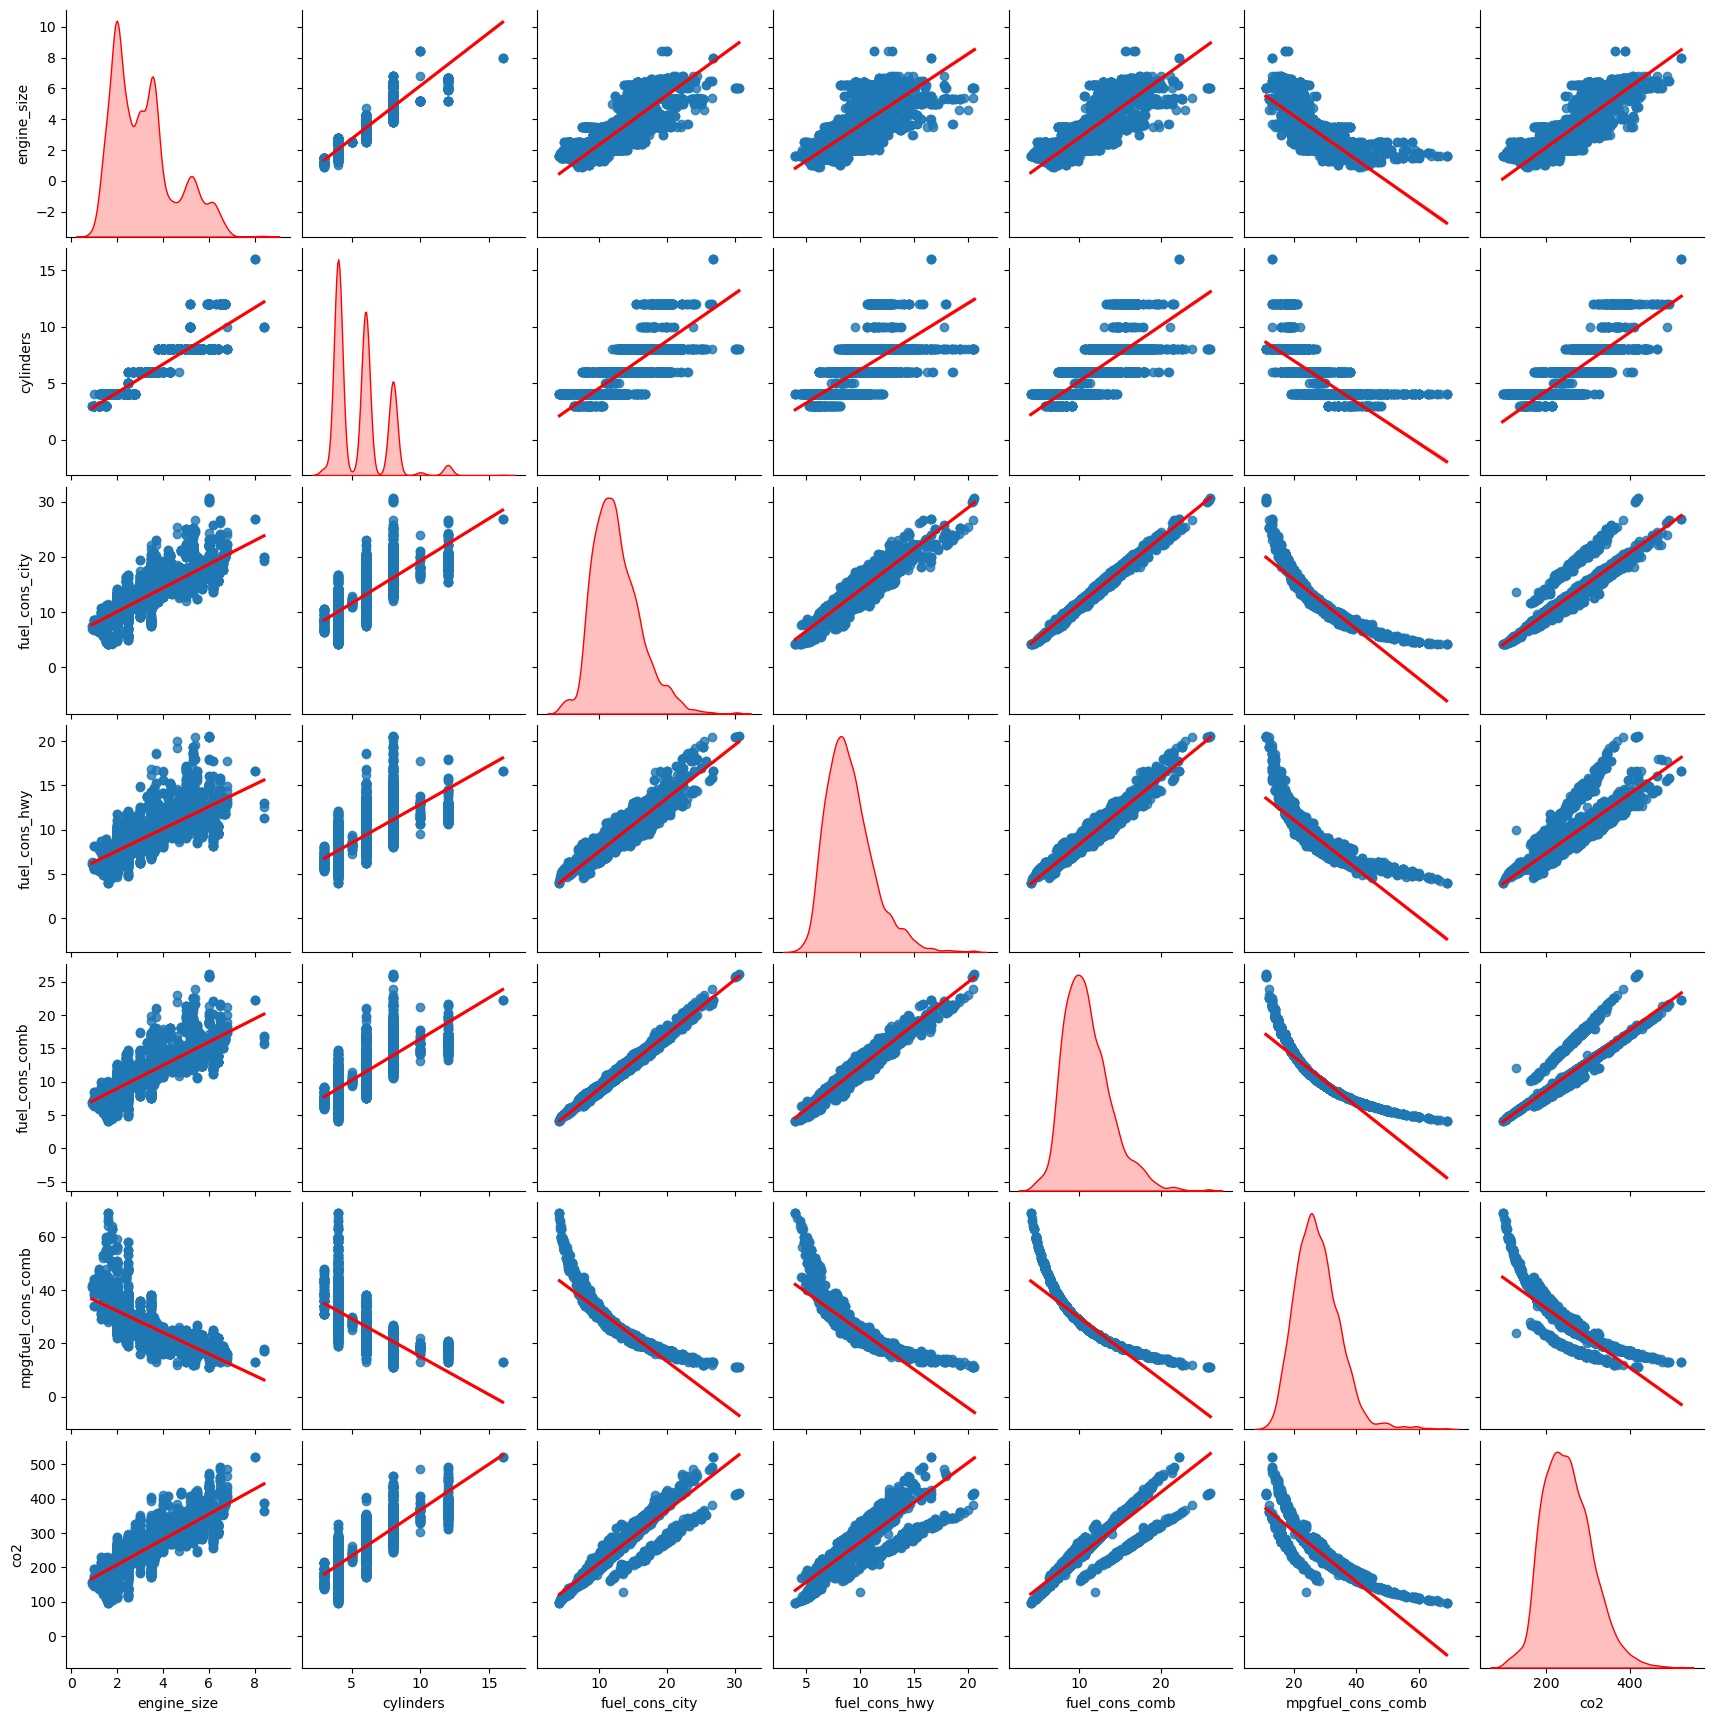

In [18]:
sns.pairplot(Data, kind = "reg", diag_kind = "kde",
             diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

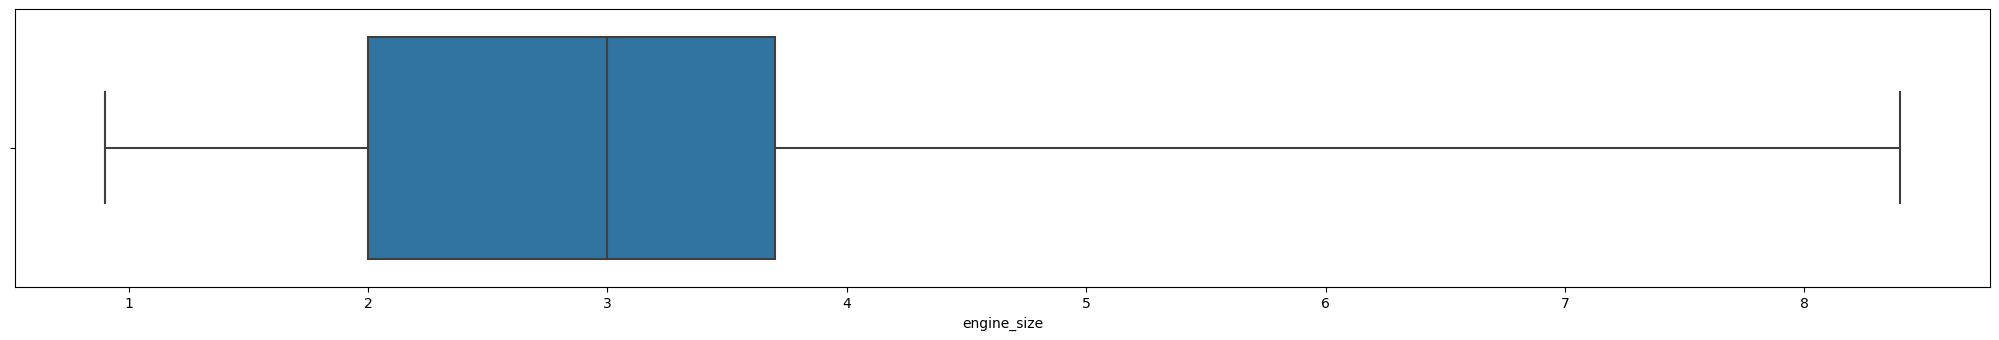

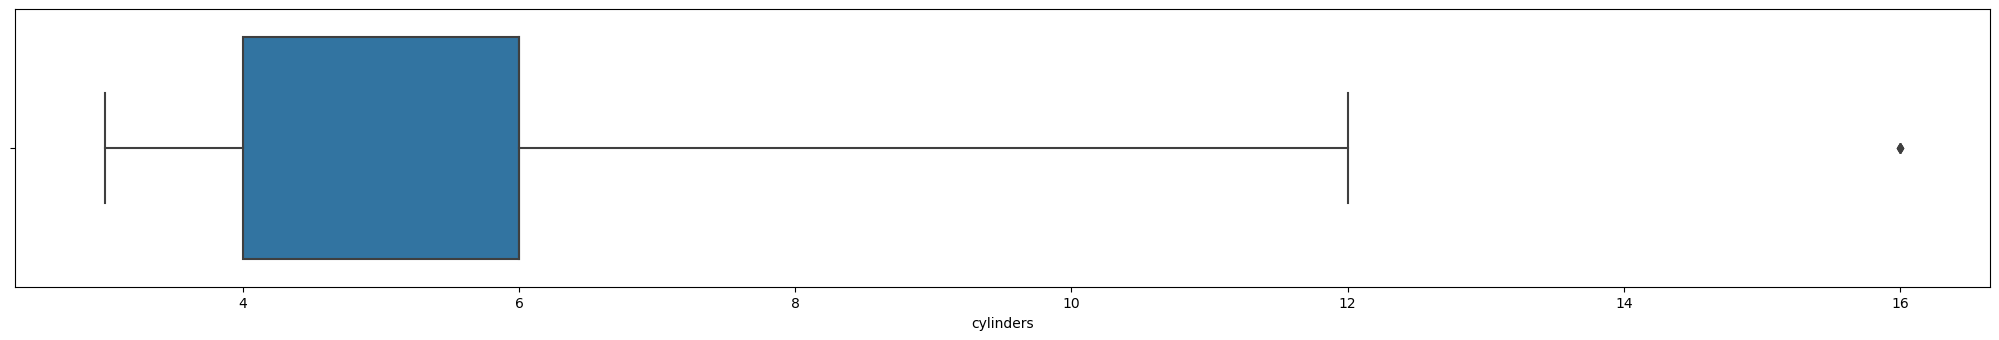

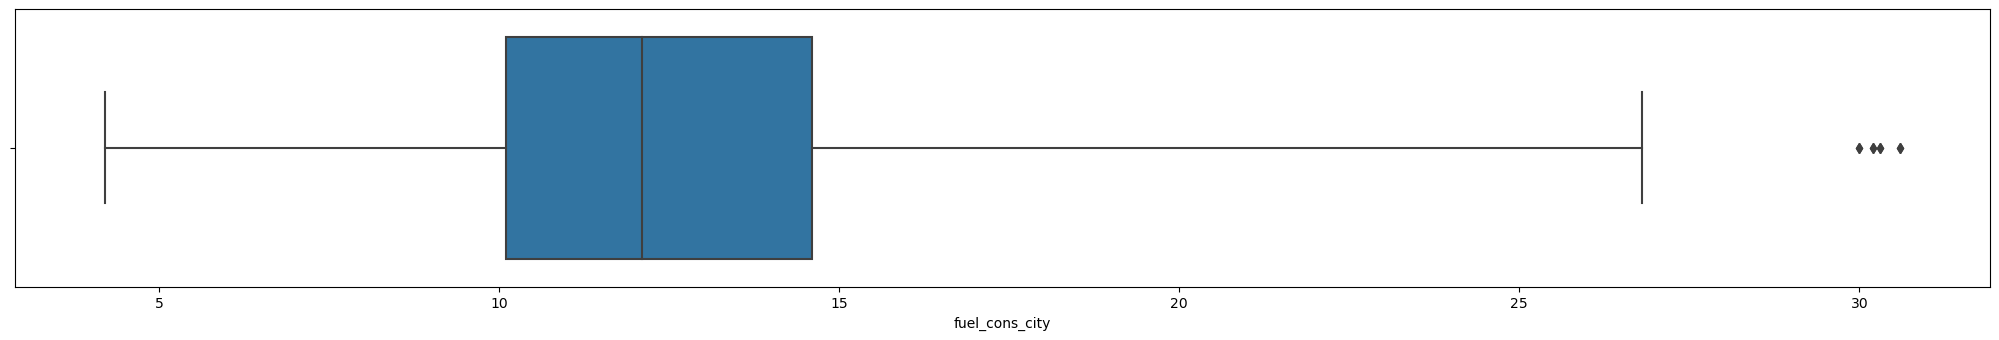

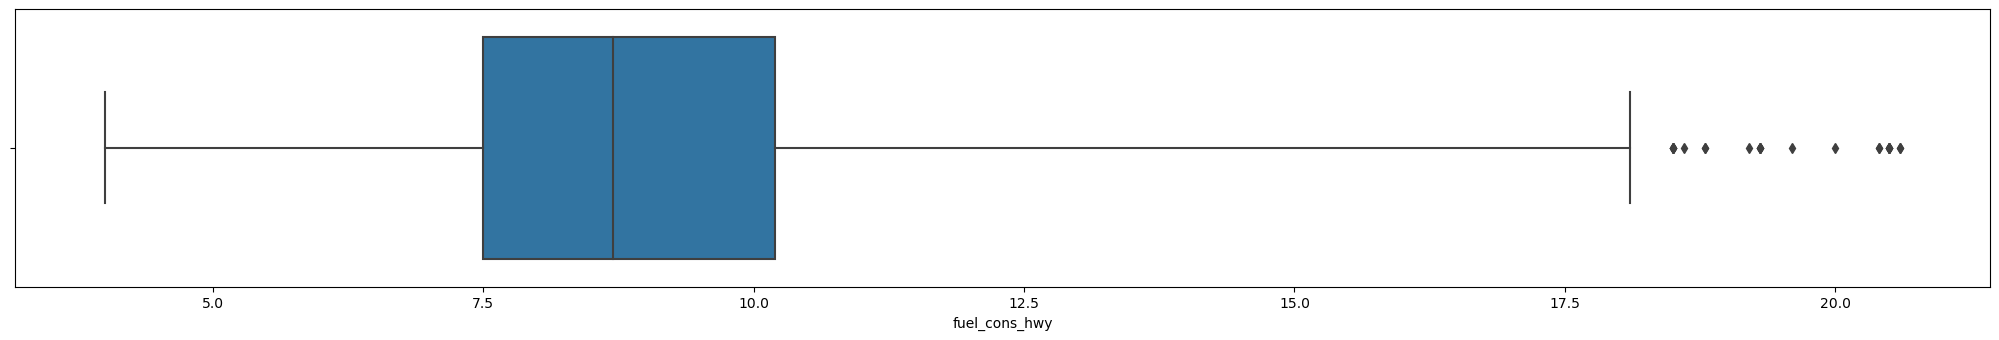

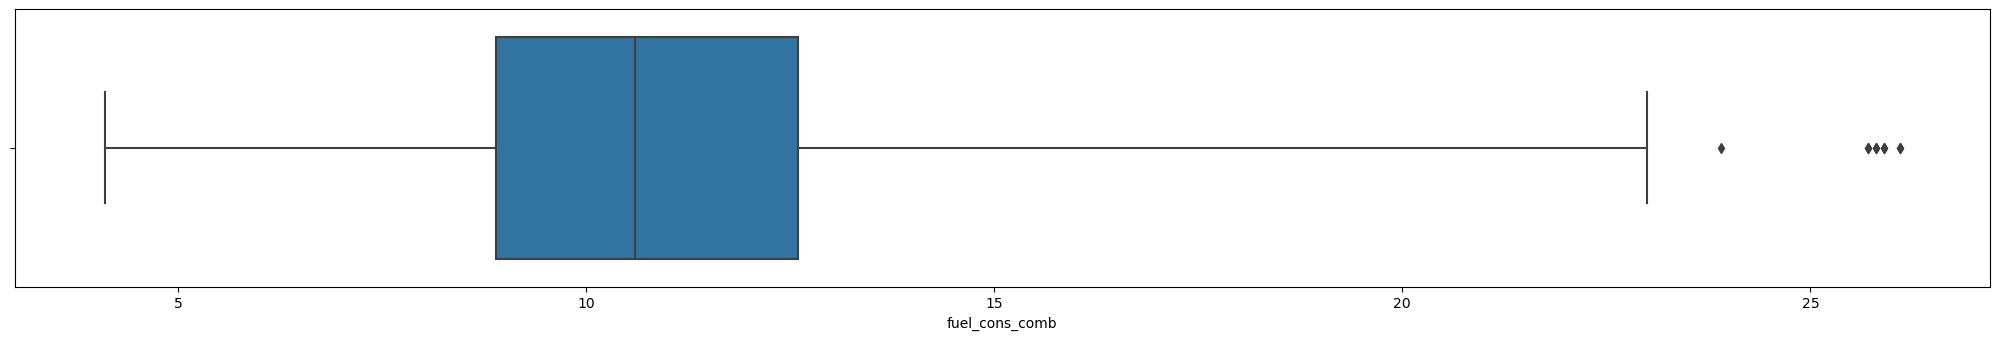

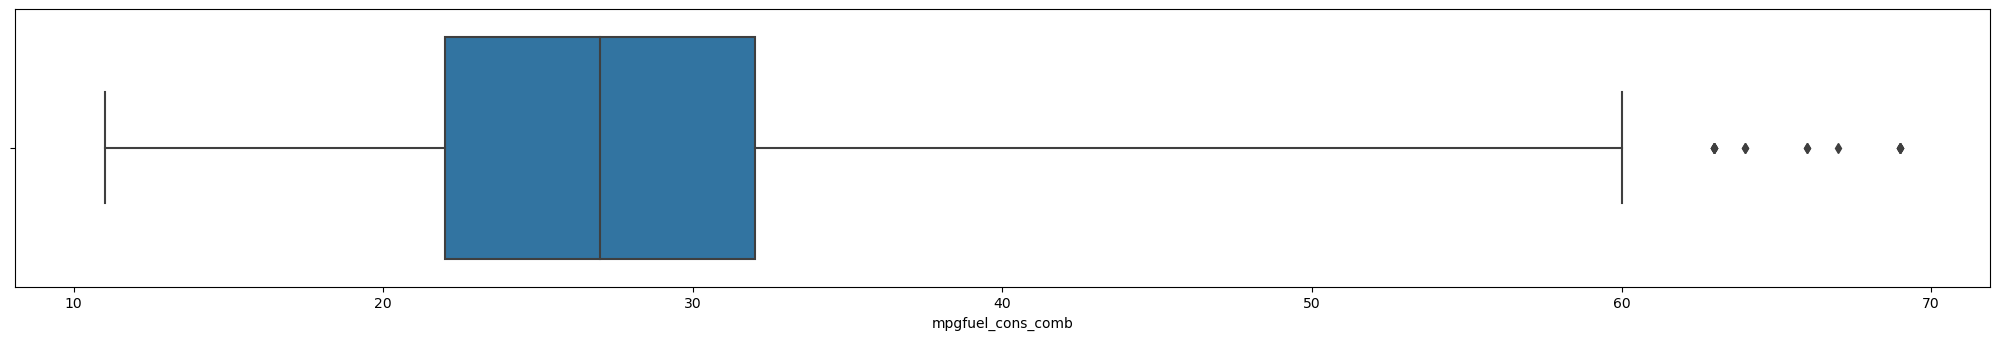

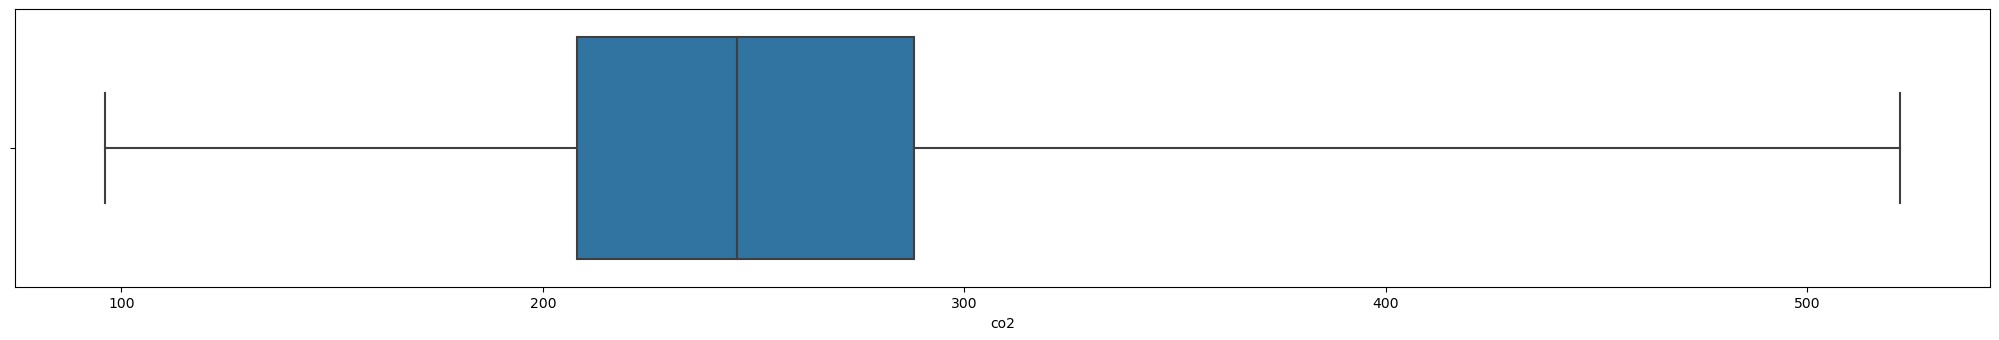

In [20]:
index=0
for feature in Data.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(Data.columns)),2,index)
    sns.boxplot(x=feature,data=Data,whis=3) 
    plt.tight_layout()
    plt.show()

In [30]:
df = Data.copy()
df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Transmission','Fuel Consumption Comb (mpg)'],inplace=True,axis=1)

In [31]:
df_correlation = df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
df_correlation

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
7380,2.0,4,9.4,219
7381,2.0,4,9.9,232
7382,2.0,4,10.3,240
7383,2.0,4,9.9,232


In [32]:
df_check = df['Fuel Type'].value_counts().reset_index().rename(columns={'count':'Count'})
df_check

,Fuel Type,Count
0,X,3637
1,Z,3202
2,E,370
3,D,175
4,N,1


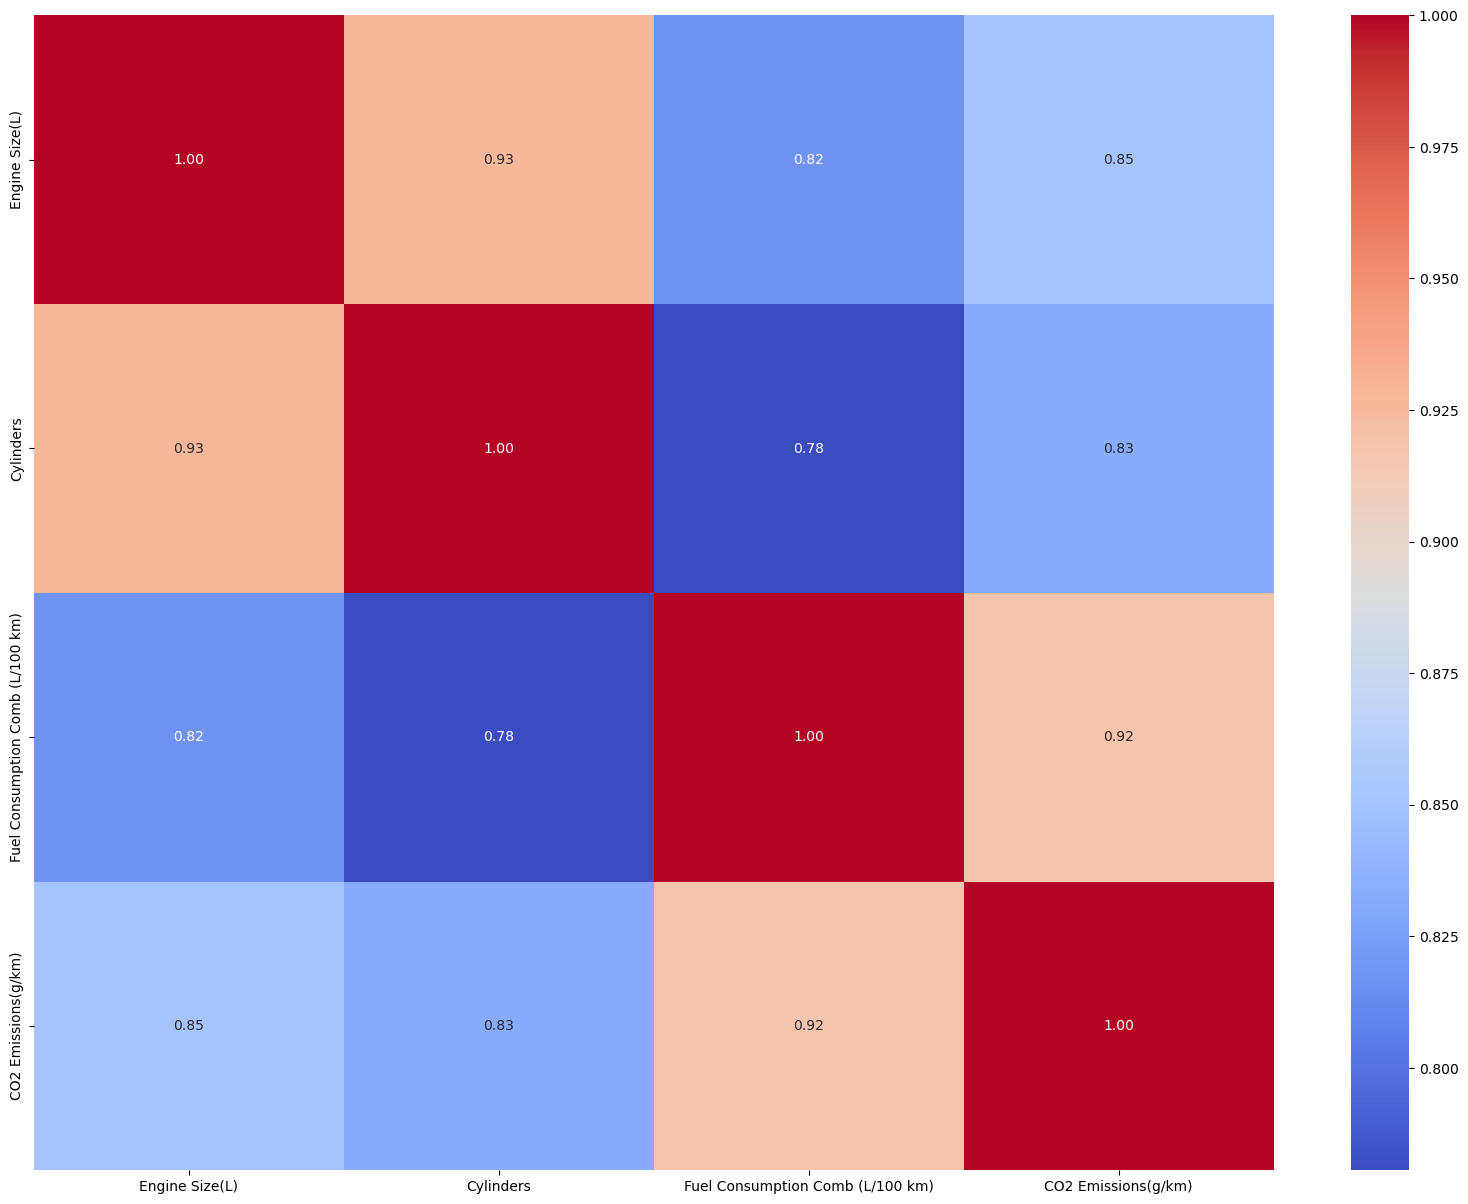

In [34]:
correlation_matrix = df_correlation.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


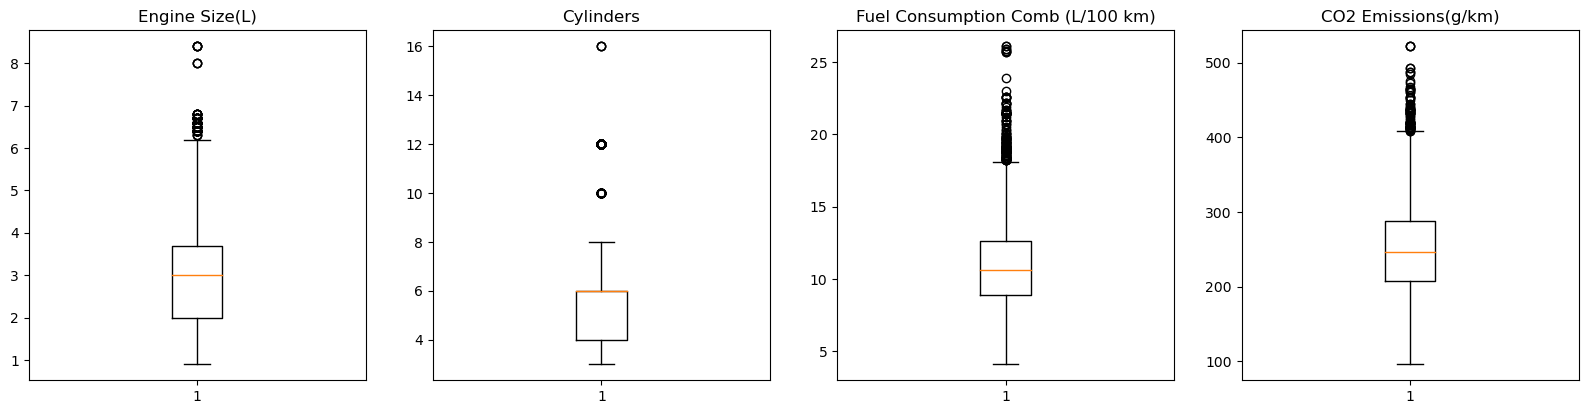

In [35]:
plt.figure(figsize = (20,10))
for i in enumerate(df_correlation):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_correlation[i[1]])

In [37]:
from scipy import stats

df_new = df_correlation[(np.abs(stats.zscore(df_correlation)) < 1.9).all(axis=1)]

In [38]:
df_new.reset_index(drop=True, inplace=True)

In [39]:
df_new


,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,3.5,6,11.1,255
3,3.5,6,10.6,244
4,3.5,6,10.0,230
...,...,...,...,...
6505,2.0,4,9.4,219
6506,2.0,4,9.9,232
6507,2.0,4,10.3,240
6508,2.0,4,9.9,232


In [40]:
print("The length of the original : " , len(df))
print("The length after removing the outliers : " , len(df_new))
print("We just Removed",len(df)-len(df_new),"Outliers")

The length of the original :  7385
The length after removing the outliers :  6510
We just Removed 875 Outliers


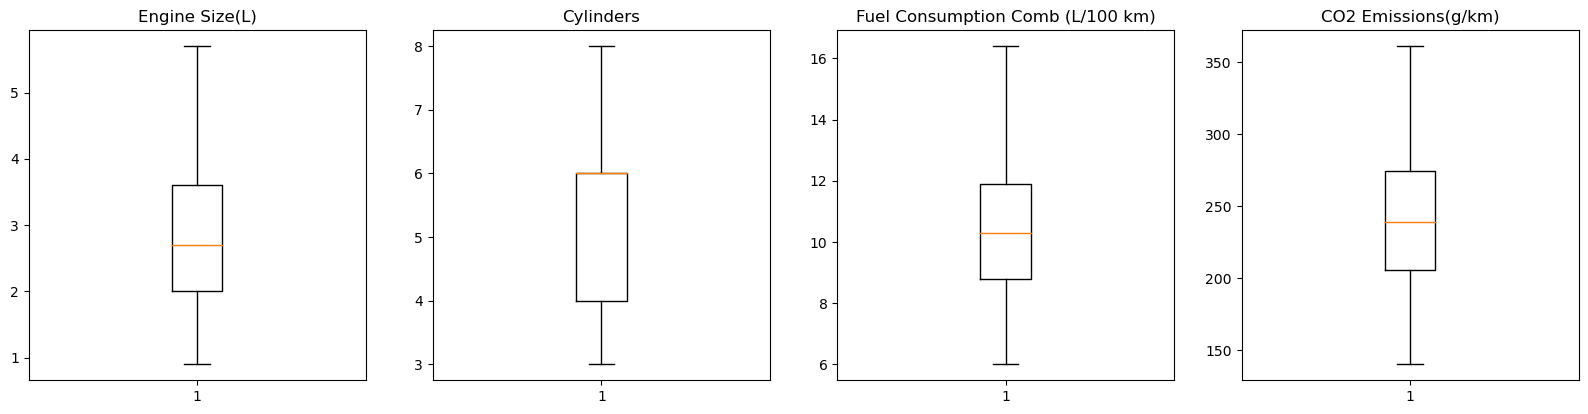

In [41]:
plt.figure(figsize = (20,10))
for i in enumerate(df_new):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_new[i[1]])

In [42]:
df

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,Z,8.5,196
1,2.4,4,Z,9.6,221
2,1.5,4,Z,5.9,136
3,3.5,6,Z,11.1,255
4,3.5,6,Z,10.6,244
...,...,...,...,...,...
7380,2.0,4,Z,9.4,219
7381,2.0,4,Z,9.9,232
7382,2.0,4,Z,10.3,240
7383,2.0,4,Z,9.9,232


In [44]:
df = Data.copy()

In [45]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [46]:
df.rename(columns ={'Make' : "make",
                    'Model' : "model",
                    'Vehicle Class' :  "vehicle_class",
                    'Engine Size(L)': "engine_size",
                    'Cylinders': "cylinders",
                   'Transmission' : "transmission",
                    'Fuel Type' : "fuel_type",
                    'Fuel Consumption City (L/100 km)' : "fuel_cons_city",
                   'Fuel Consumption Hwy (L/100 km)': "fuel_cons_hwy",
                    'Fuel Consumption Comb (L/100 km)' :"fuel_cons_comb",
                   'Fuel Consumption Comb (mpg)' : "fuel_cons_comb_mpg"
                    , 'CO2 Emissions(g/km)' : "co2"
                   }, inplace = True)

In [47]:
df.duplicated().sum()


1103

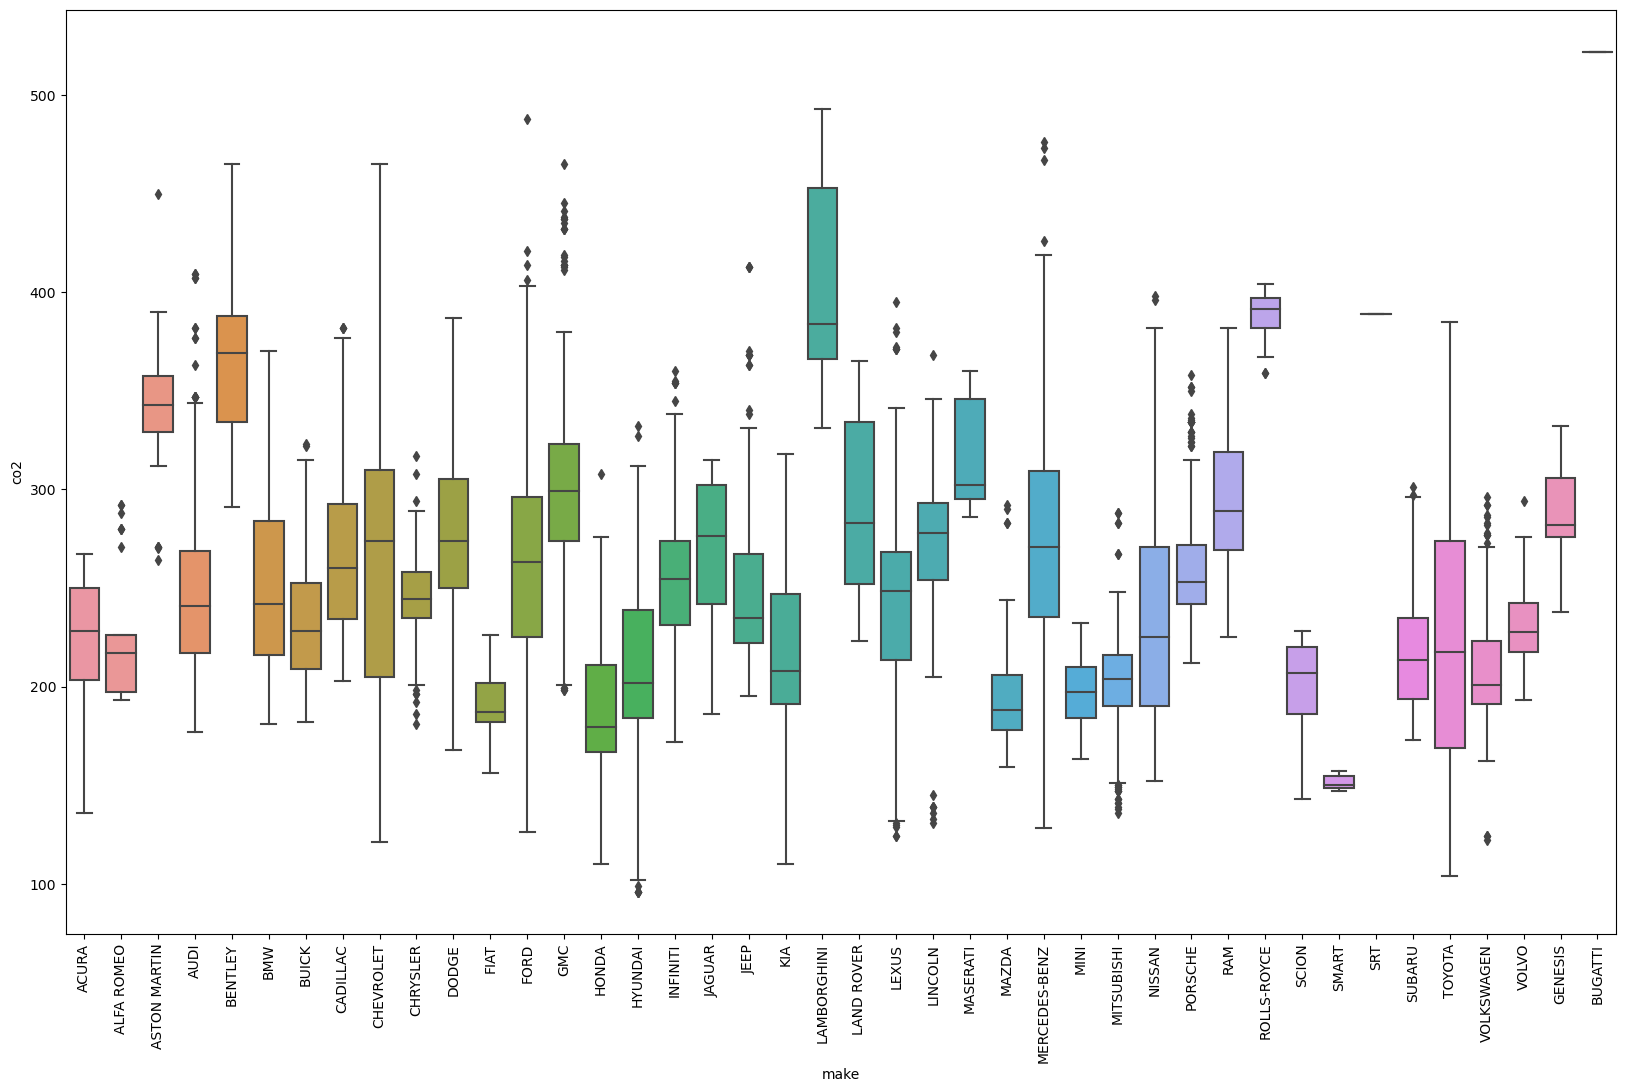

In [48]:
sns.boxplot(x = df.make, y = df.co2)
plt.xticks(rotation = 90)
plt.show()

In [49]:
df[df.make.isin(["BUGATTI", "SRT"])][["make", "co2"]]


,make,co2
945,SRT,389
946,SRT,389
4509,BUGATTI,522
5575,BUGATTI,522
6640,BUGATTI,522


In [50]:
top_models = df.model.value_counts()[:20]
top_models

model
F-150 FFV 4X4    32
F-150 FFV        32
MUSTANG          27
FOCUS FFV        24
SONIC            20
SONIC 5          20
F-150 4X4        20
F-150            20
ACCORD           19
COMPASS          19
JETTA            19
ATS              19
TACOMA 4WD       19
CAMARO           18
SIERRA           18
COROLLA          18
SIERRA 4WD       18
SILVERADO 4WD    18
SILVERADO        18
FORTE 5          18
Name: count, dtype: int64

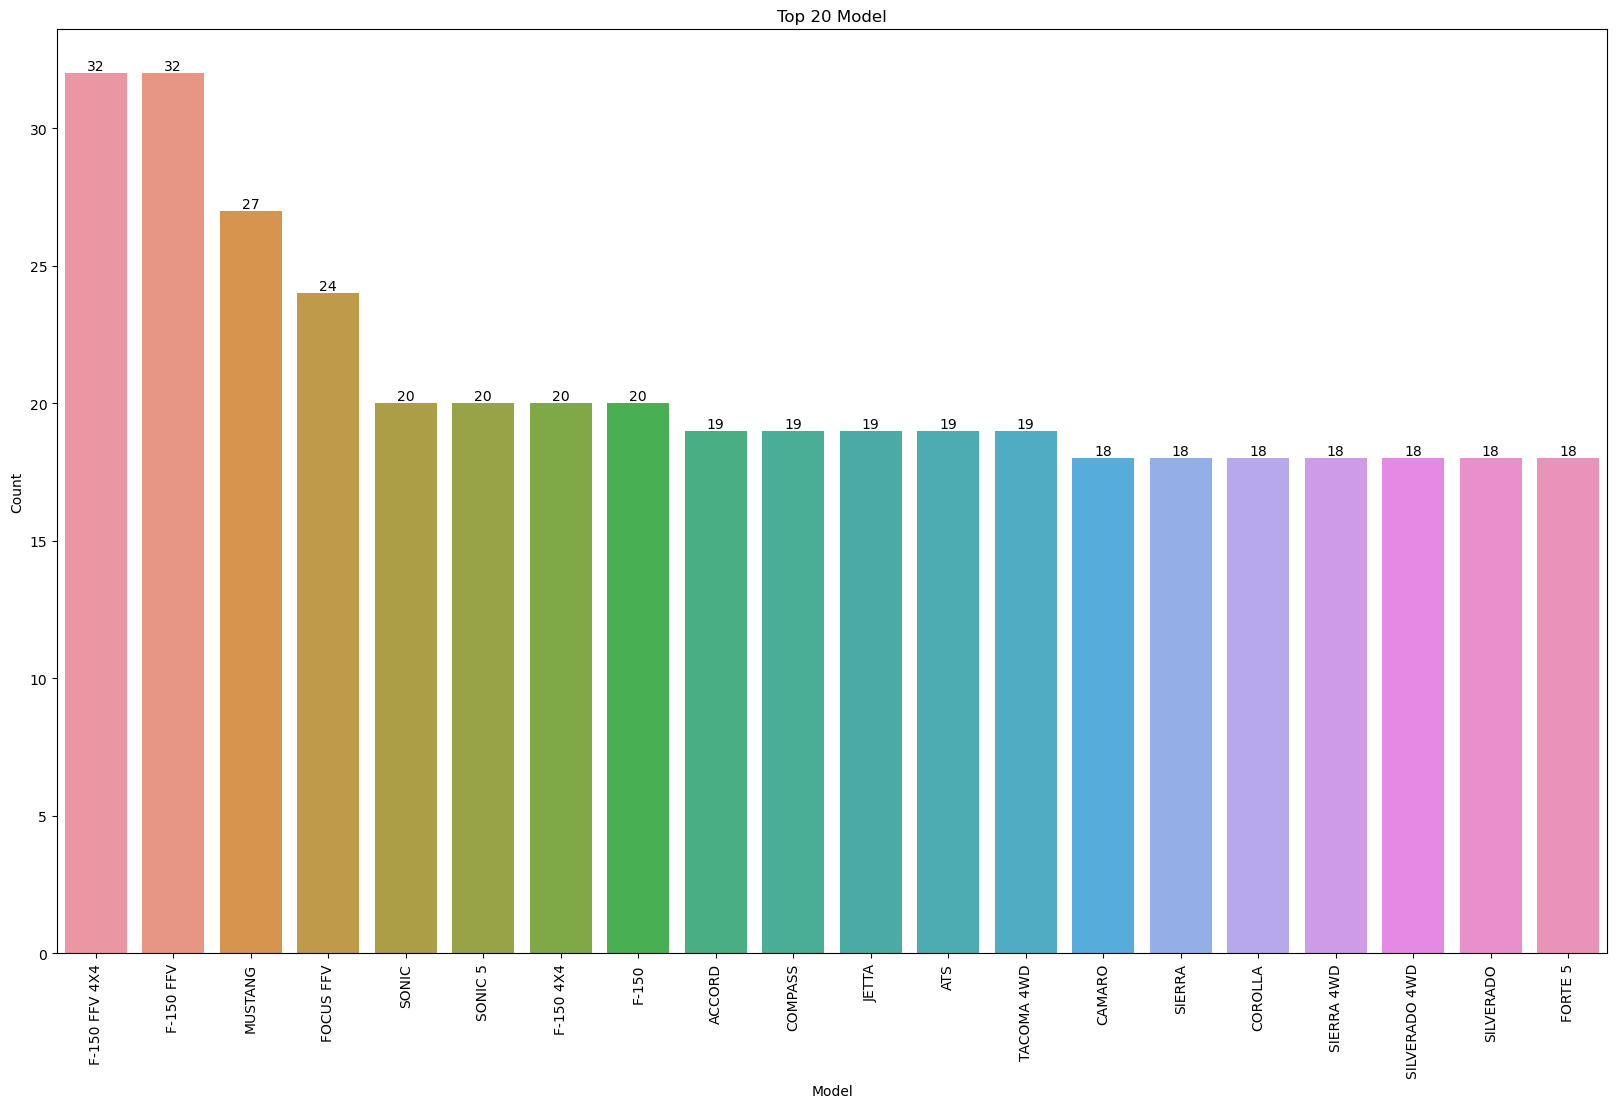

In [51]:
a = sns.countplot(x = "model", data = df, order = top_models.index)

plt.xticks(rotation = 90)
plt.title("Top 20 Model")
plt.xlabel("Model")
plt.ylabel("Count")
plt.bar_label(a.containers[0])

plt.show()

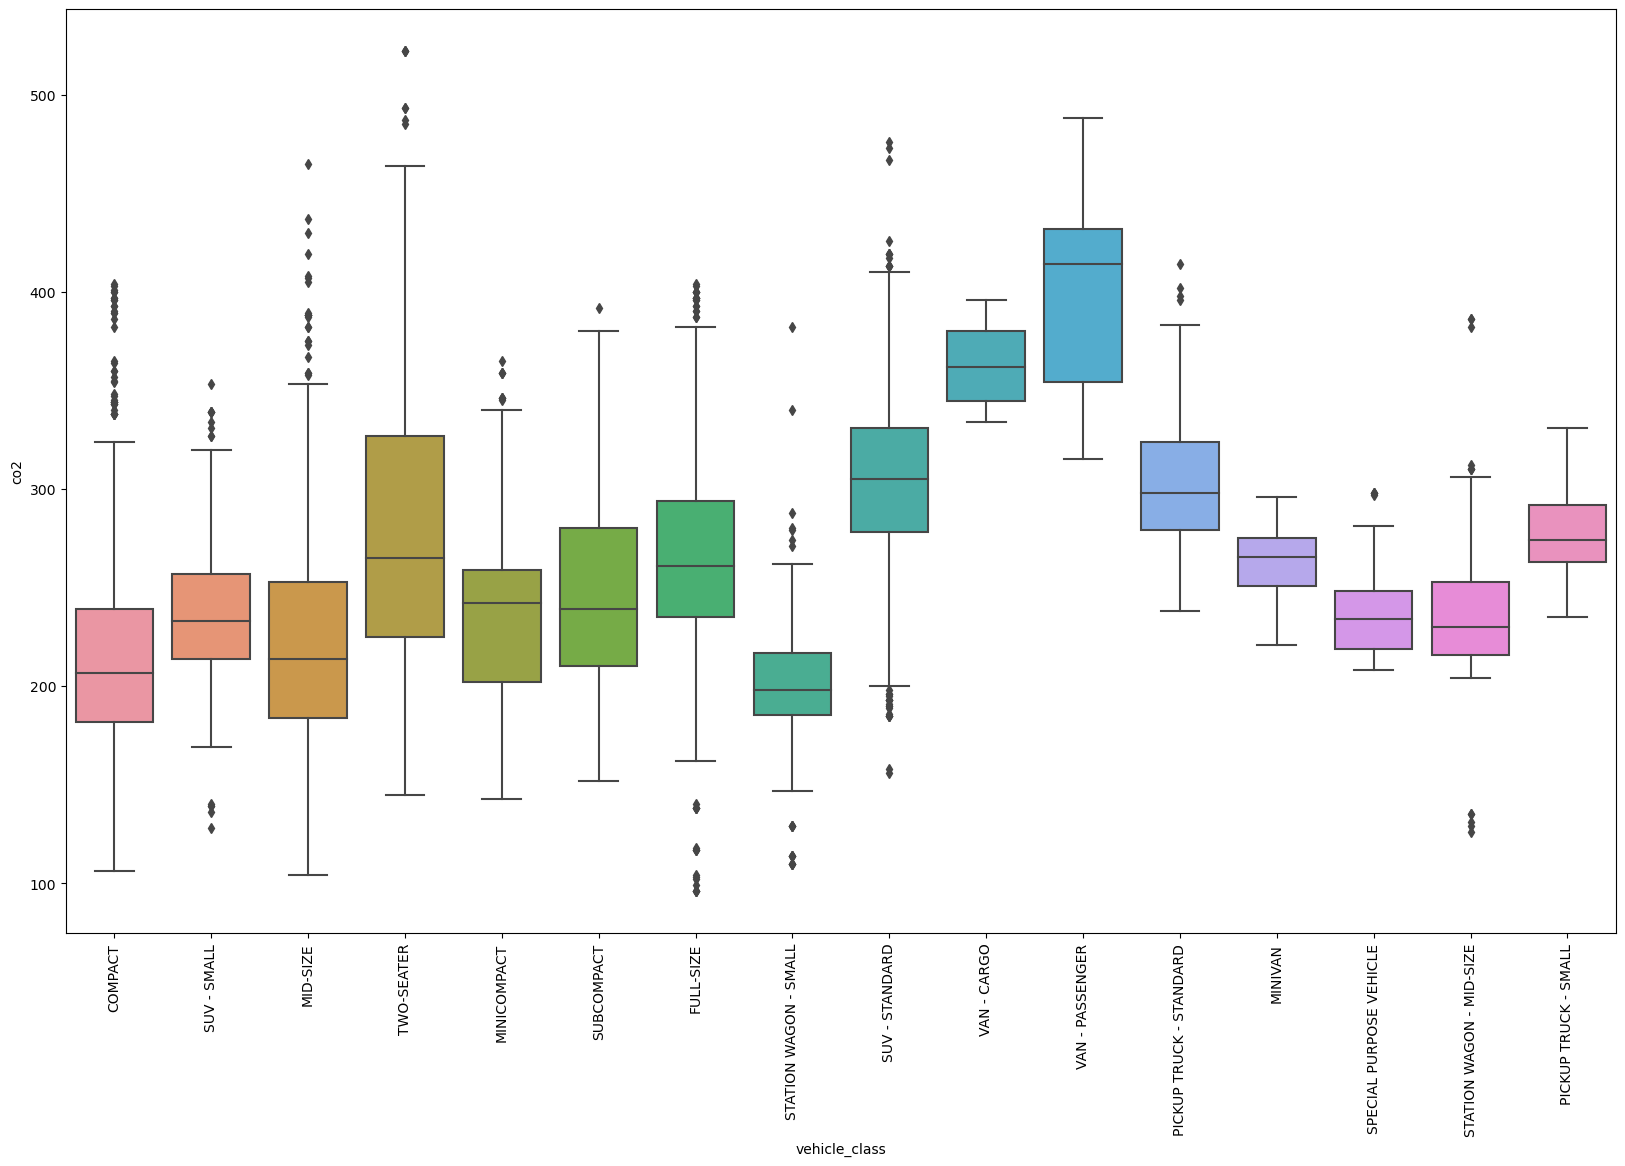

In [53]:
sns.boxplot(x = "vehicle_class", y = "co2", data = df)
plt.xticks(rotation = 90)
plt.show()

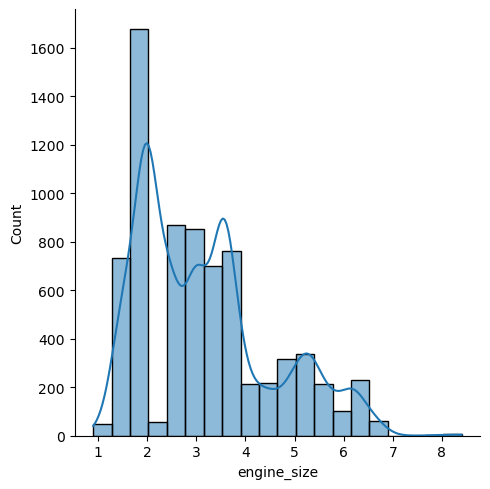

In [54]:
sns.displot(data = df, x = "engine_size", kde = True, bins = 20);


<function matplotlib.pyplot.show(close=None, block=None)>

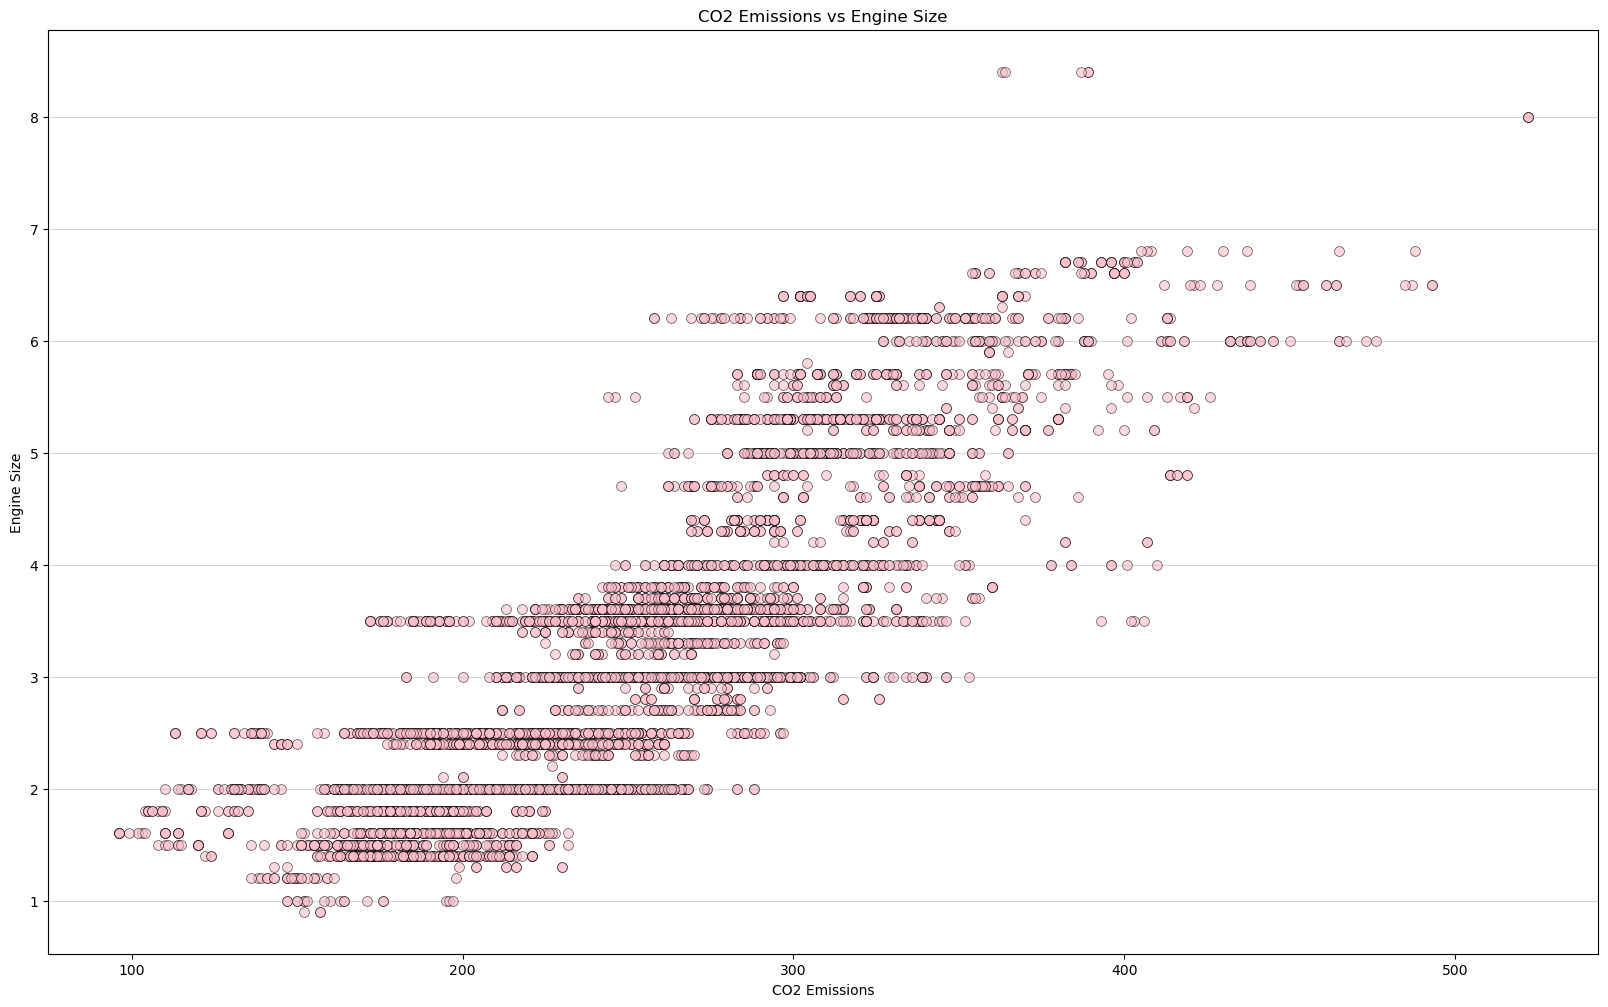

In [55]:
sns.scatterplot(data = df, x = "co2", y = "engine_size", alpha = 0.6, color = "pink" , edgecolor = "k", s = 50)
plt.xlabel("CO2 Emissions")
plt.ylabel("Engine Size")
plt.title("CO2 Emissions vs Engine Size")
plt.grid(axis = "y", alpha = 0.5)
plt.show

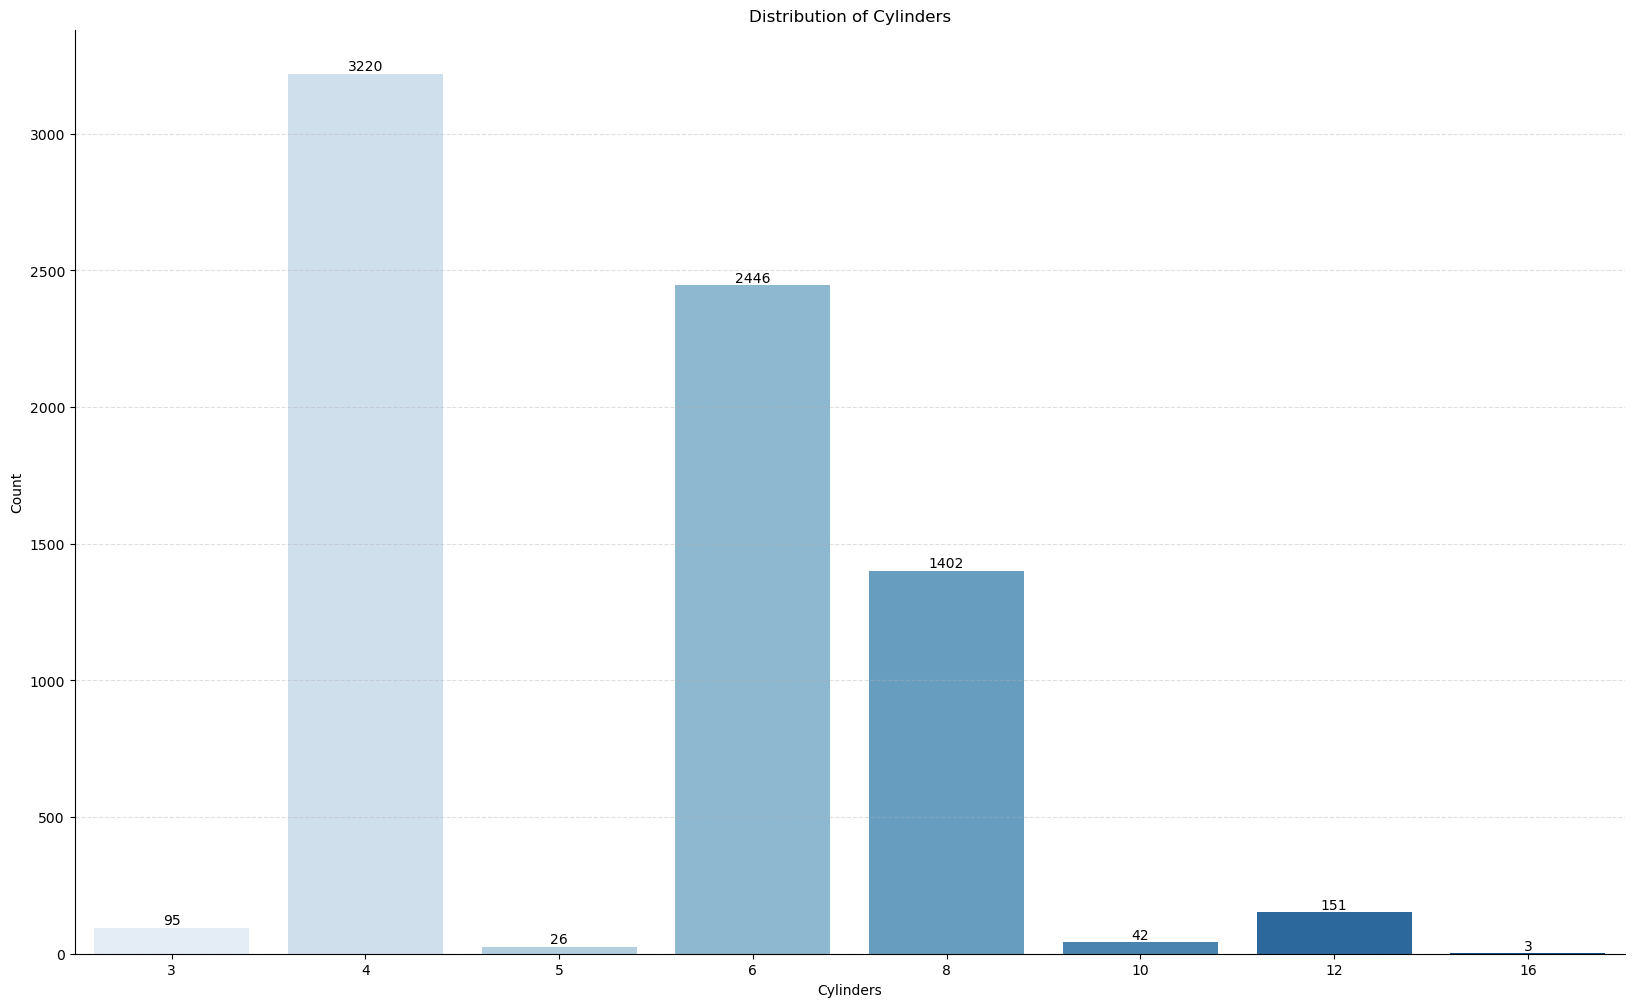

In [56]:
a = sns.countplot(data = df, x = df.cylinders, palette = "Blues")
plt.bar_label(a.containers[0])
plt.xlabel("Cylinders")
plt.ylabel("Count")
plt.title("Distribution of Cylinders")

plt.grid(axis = "y", linestyle = "--", alpha = 0.4)
sns.despine() # sağ ve üstteki çerceve çizgisini kaldırdı
plt.show()

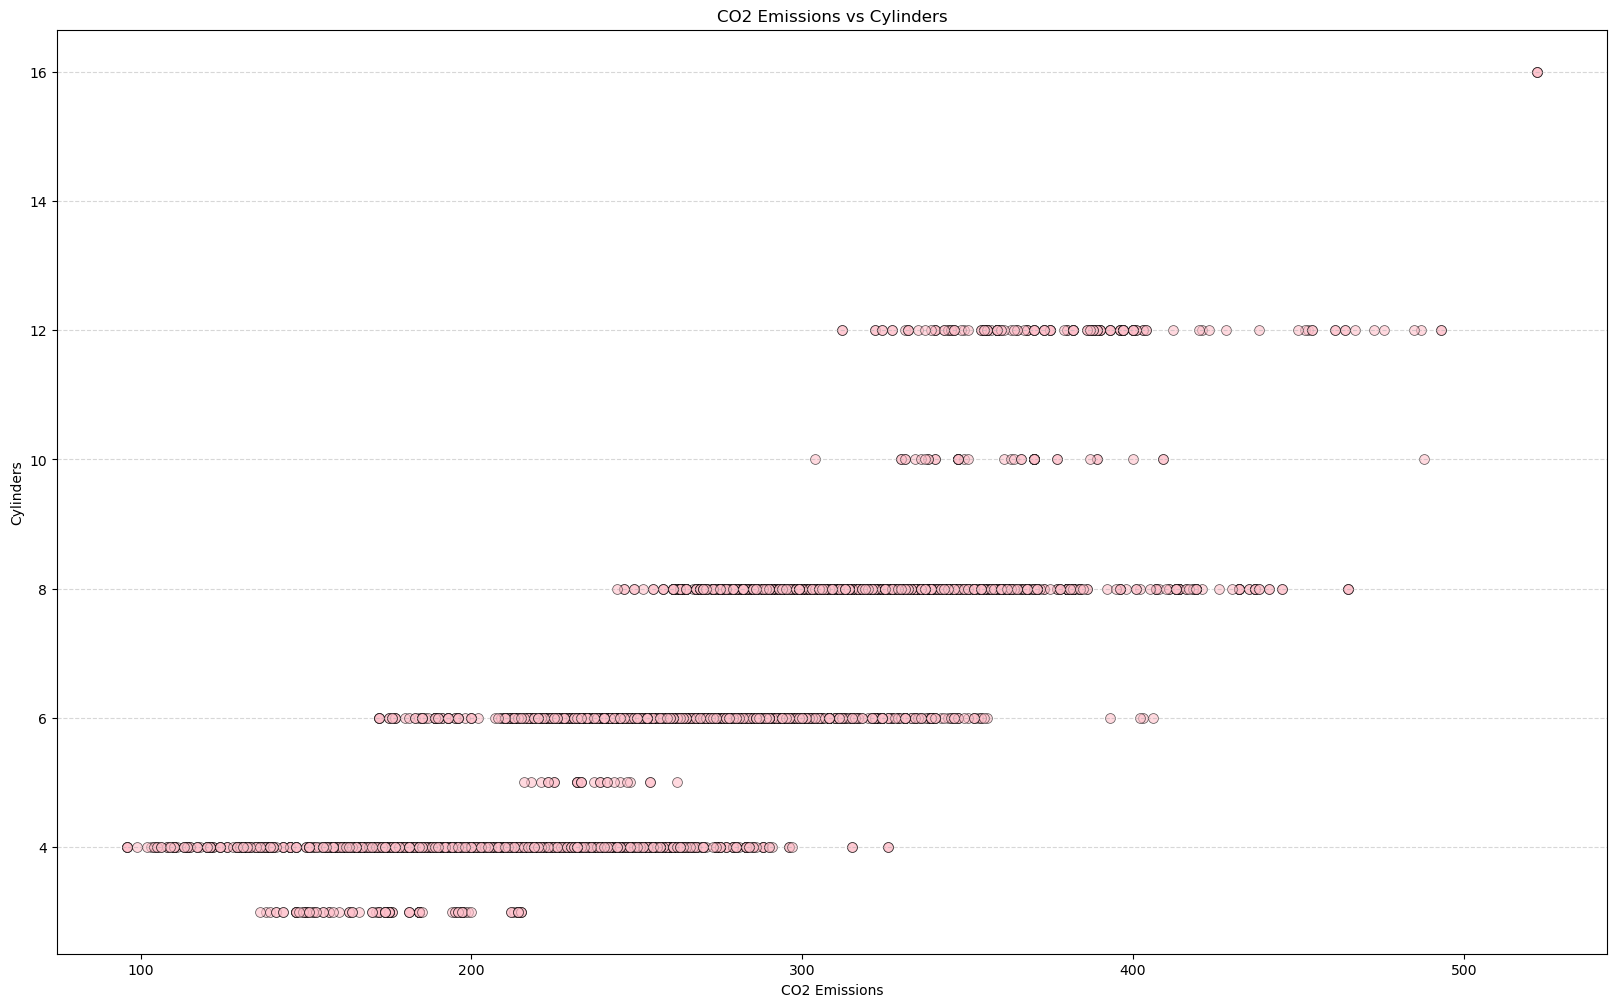

In [57]:
sns.scatterplot(data = df, x = "co2", y = "cylinders", alpha = 0.6, color = "pink" , edgecolor = "k", s = 50)
plt.xlabel("CO2 Emissions")
plt.ylabel("Cylinders")
plt.title("CO2 Emissions vs Cylinders")
plt.grid(axis = "y", alpha = 0.5, linestyle = "--")
plt.show()

In [58]:
import re

df["gears"] = df["transmission"].copy()

df["gears"] = df["gears"].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else "No Gears")

df["transmission"] = df["transmission"].apply(lambda x: re.findall("[A-Za-z]+", str(x))[0] if re.findall("[A-Za-z]+", str(x)) else None)

In [59]:
re.findall(r'\d+', 'AS10')


['10']

In [60]:
re.findall("[A-Za-z]+", 'AS66')

['AS']

In [61]:
df = df[['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'gears', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'fuel_cons_comb_mpg', 'co2']]
#gears ile transmission sütunlarını yan yana görmek için sütun sırasını tekrar düzenledim
df.sample(5)

,make,model,vehicle_class,engine_size,cylinders,transmission,gears,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
2686,GMC,YUKON 4WD,SUV - STANDARD,5.3,8,A,6,X,15.2,10.8,13.2,21,310
6316,PORSCHE,911 Carrera T,MINICOMPACT,3.0,6,AM,7,Z,11.9,9.1,10.6,27,248
3910,JEEP,PATRIOT 4X4,SUV - SMALL,2.4,4,M,5,X,10.6,8.7,9.8,29,230
697,MASERATI,QUATTROPORTE SQ4,FULL-SIZE,3.0,6,AS,8,Z,15.9,9.7,13.1,22,301
2938,MASERATI,QUATTROPORTE S,FULL-SIZE,3.0,6,AS,8,Z,15.2,10.2,12.9,22,300


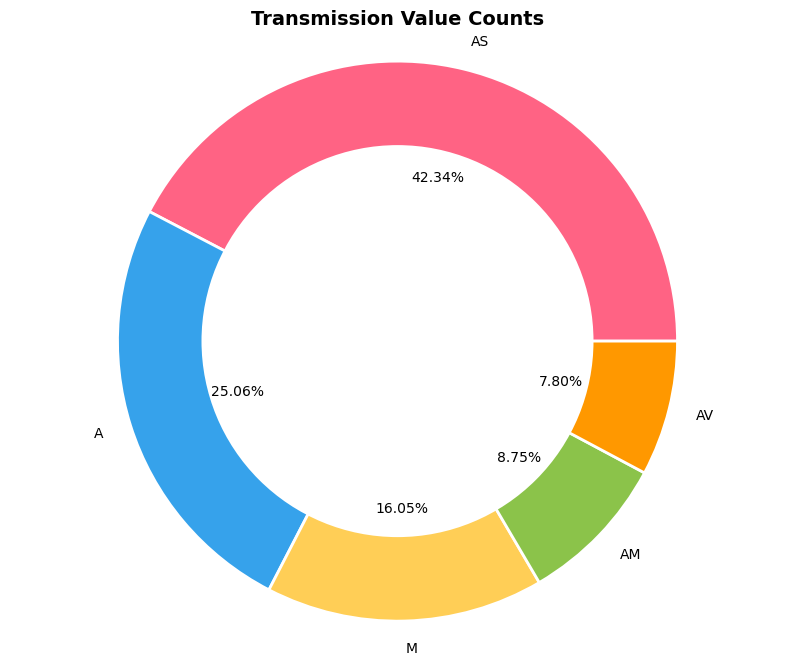

In [62]:
transmission_counts = df.transmission.value_counts()
transmission_labels = transmission_counts.index
transmission_values = transmission_counts.values

colors = ['#FF6384', '#36A2EB', '#FFCE56', '#8BC34A', '#FF9800']

plt.figure(figsize = (10, 8))
plt.pie(transmission_values, labels = transmission_labels, autopct = "%.2f%%", colors = colors, wedgeprops = {'linewidth': 2, 'edgecolor': 'white'})

centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Transmission Value Counts", fontsize = 14, fontweight = 'bold')
plt.axis("equal") 

plt.show()

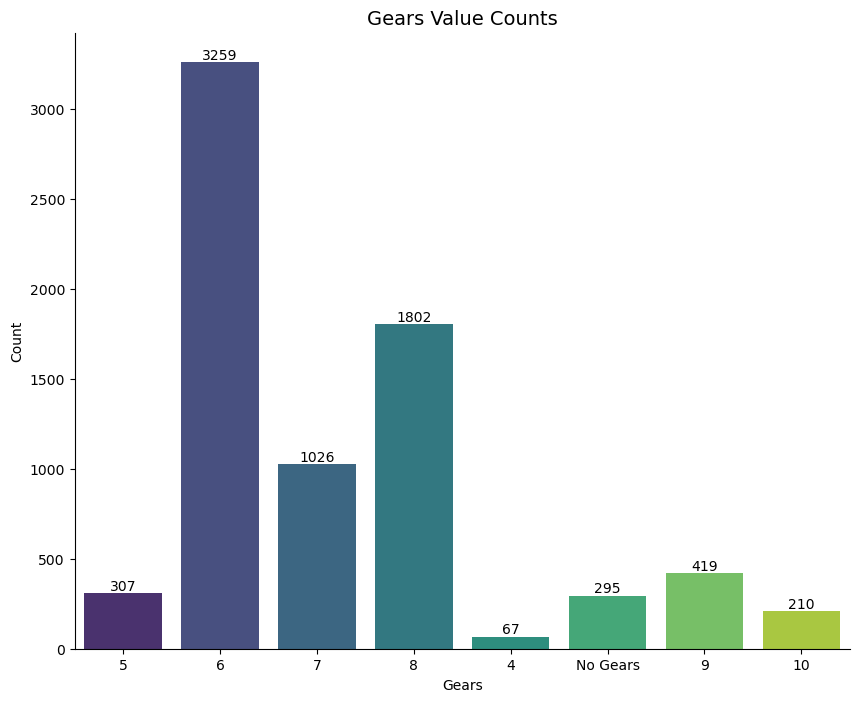

In [63]:
plt.figure(figsize = (10, 8))
a = sns.countplot(data = df, x = "gears", palette = "viridis")

plt.bar_label(a.containers[0])
plt.title("Gears Value Counts", fontsize = 14)
plt.xlabel("Gears")
plt.ylabel("Count")
sns.despine()

plt.show()

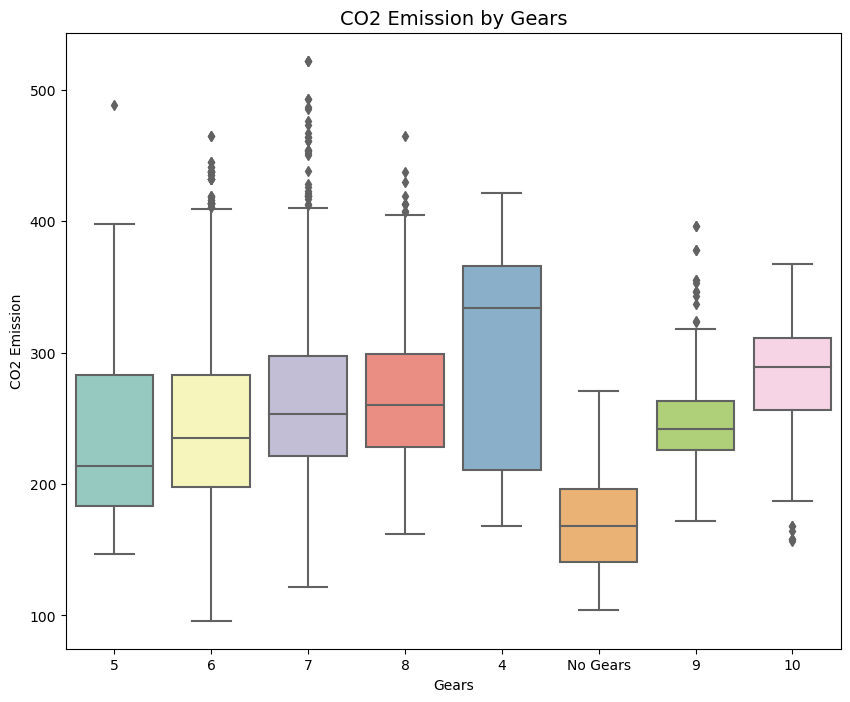

In [64]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = "gears", y = "co2", data = df, palette = 'Set3')

plt.title("CO2 Emission by Gears", fontsize = 14)
plt.xlabel("Gears")
plt.ylabel("CO2 Emission")

plt.show()

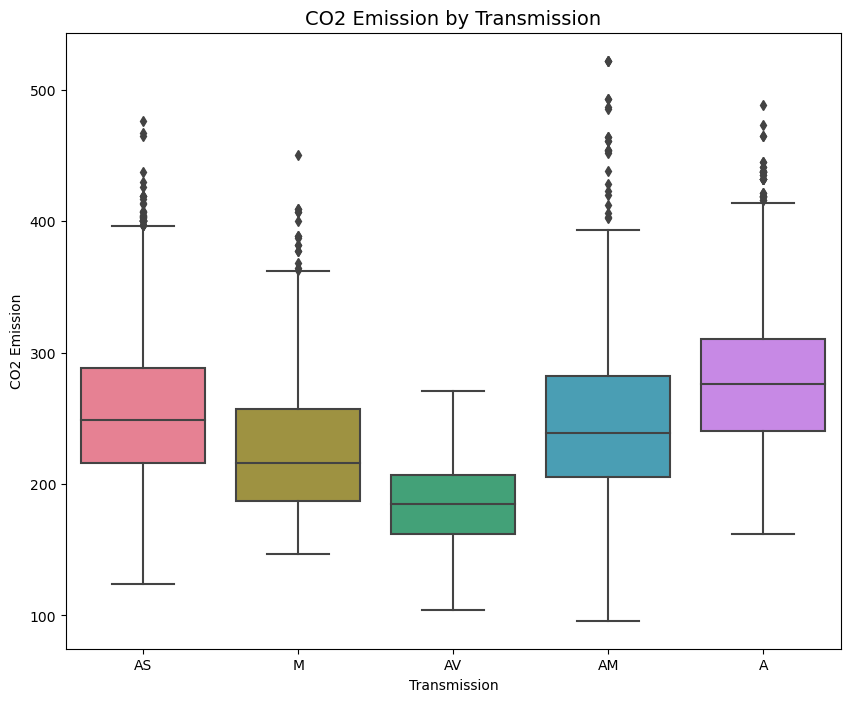

In [65]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = "transmission", y = "co2", data = df, palette = 'husl')

plt.title("CO2 Emission by Transmission", fontsize = 14)
plt.xlabel("Transmission")
plt.ylabel("CO2 Emission")

plt.show()

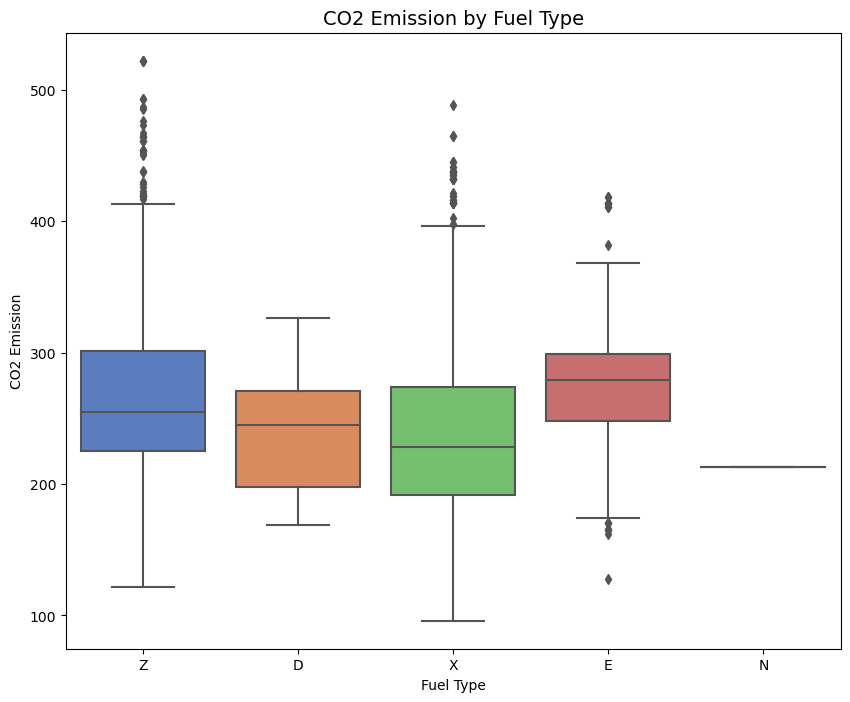

In [66]:
plt.figure(figsize = (10, 8))
sns.boxplot(x = "fuel_type", y = "co2", data = df, palette = "muted")

plt.title("CO2 Emission by Fuel Type", fontsize = 14)
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emission")

plt.show()

In [69]:
df_new.to_csv("Data_ml/CO2 Emission by Vehicles.csv")

In [70]:
df_new

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,3.5,6,11.1,255
3,3.5,6,10.6,244
4,3.5,6,10.0,230
...,...,...,...,...
6505,2.0,4,9.4,219
6506,2.0,4,9.9,232
6507,2.0,4,10.3,240
6508,2.0,4,9.9,232


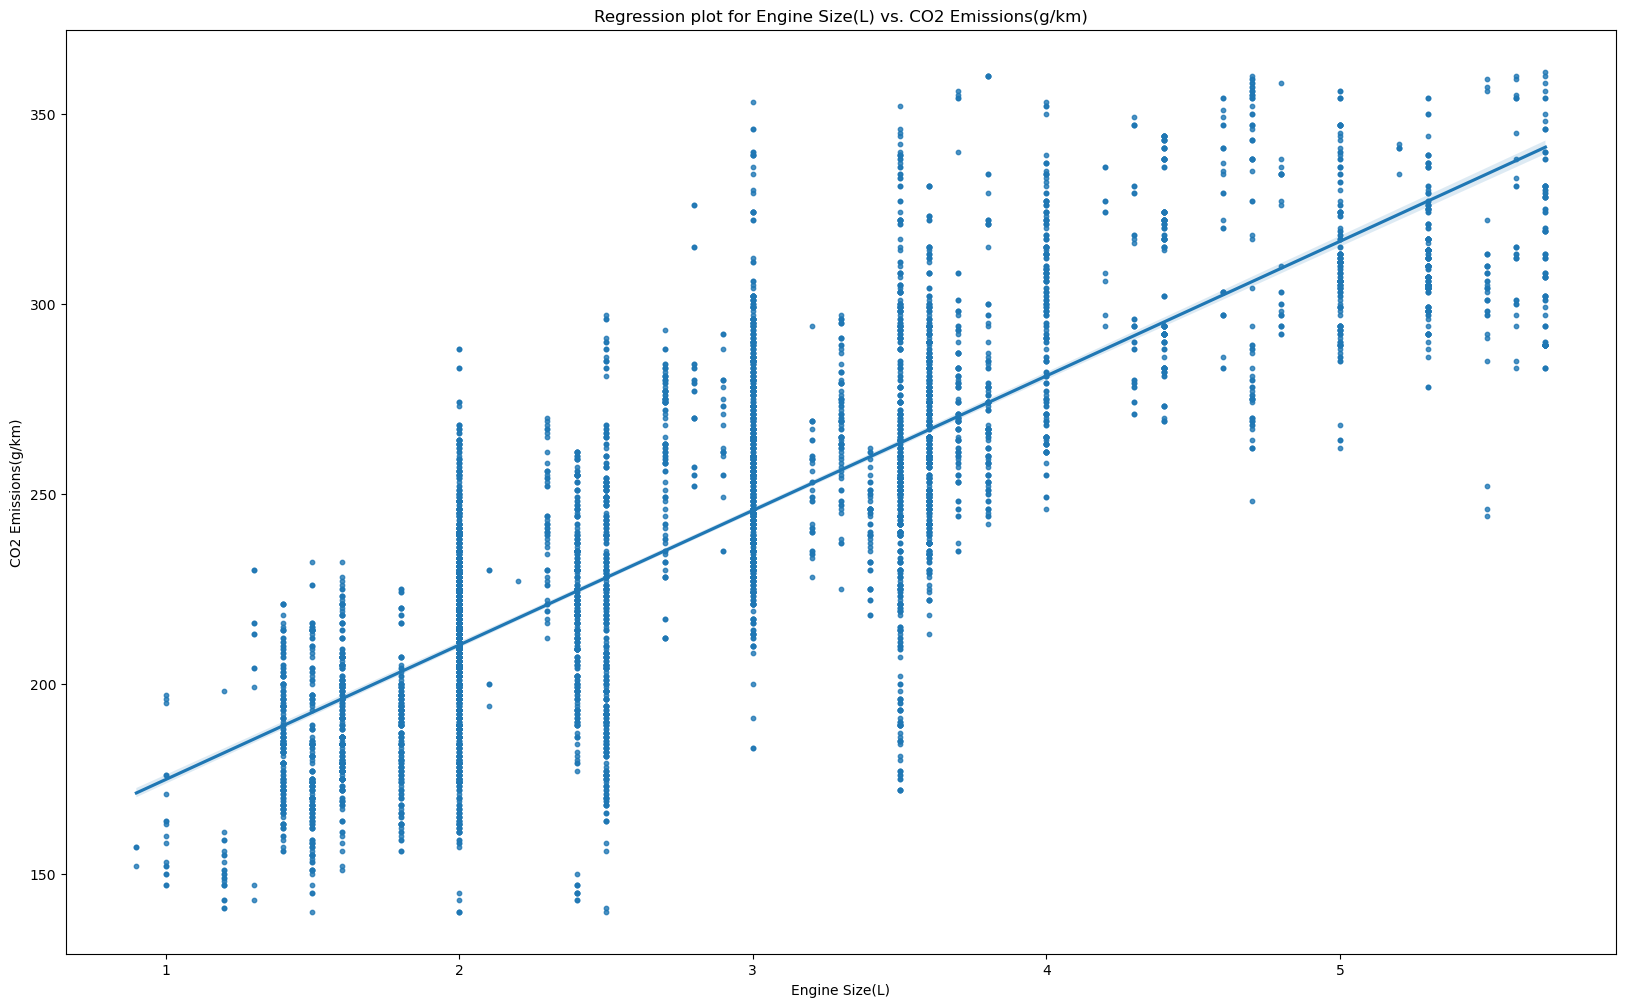

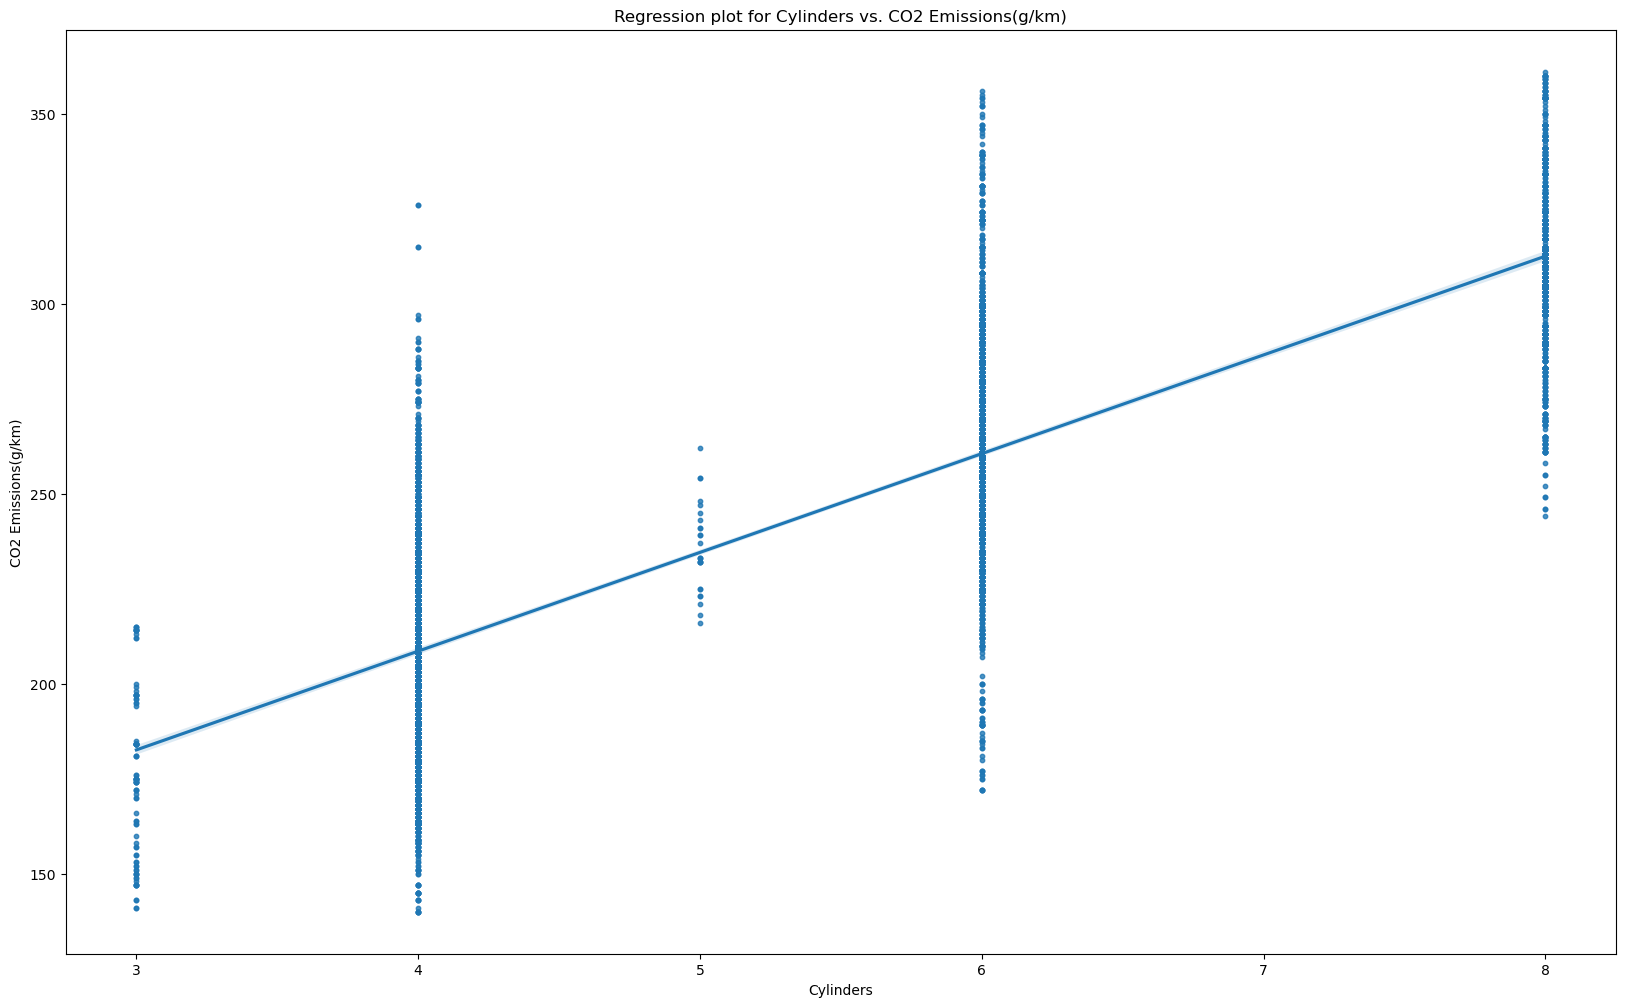

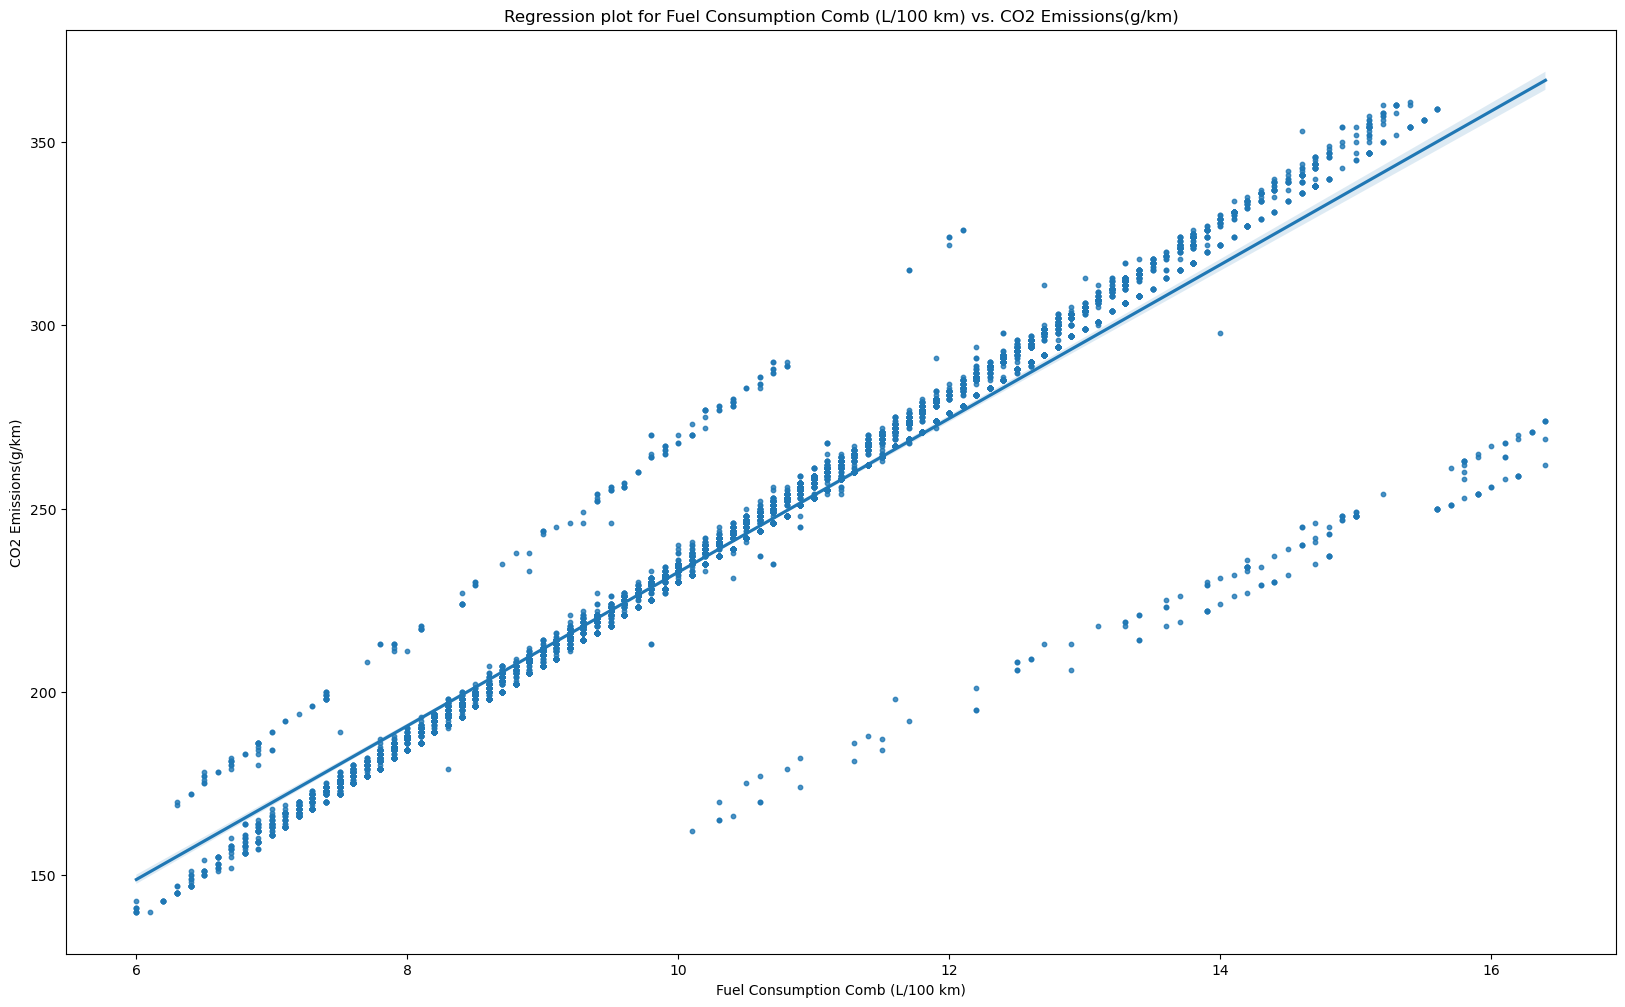

In [72]:
selected_features =df_new.columns[:-1]

for feature in selected_features:
    sns.regplot(x=feature, y='CO2 Emissions(g/km)', data=df_new, scatter_kws={'s': 10})
    plt.title(f'Regression plot for {feature} vs. CO2 Emissions(g/km)')
    plt.show()


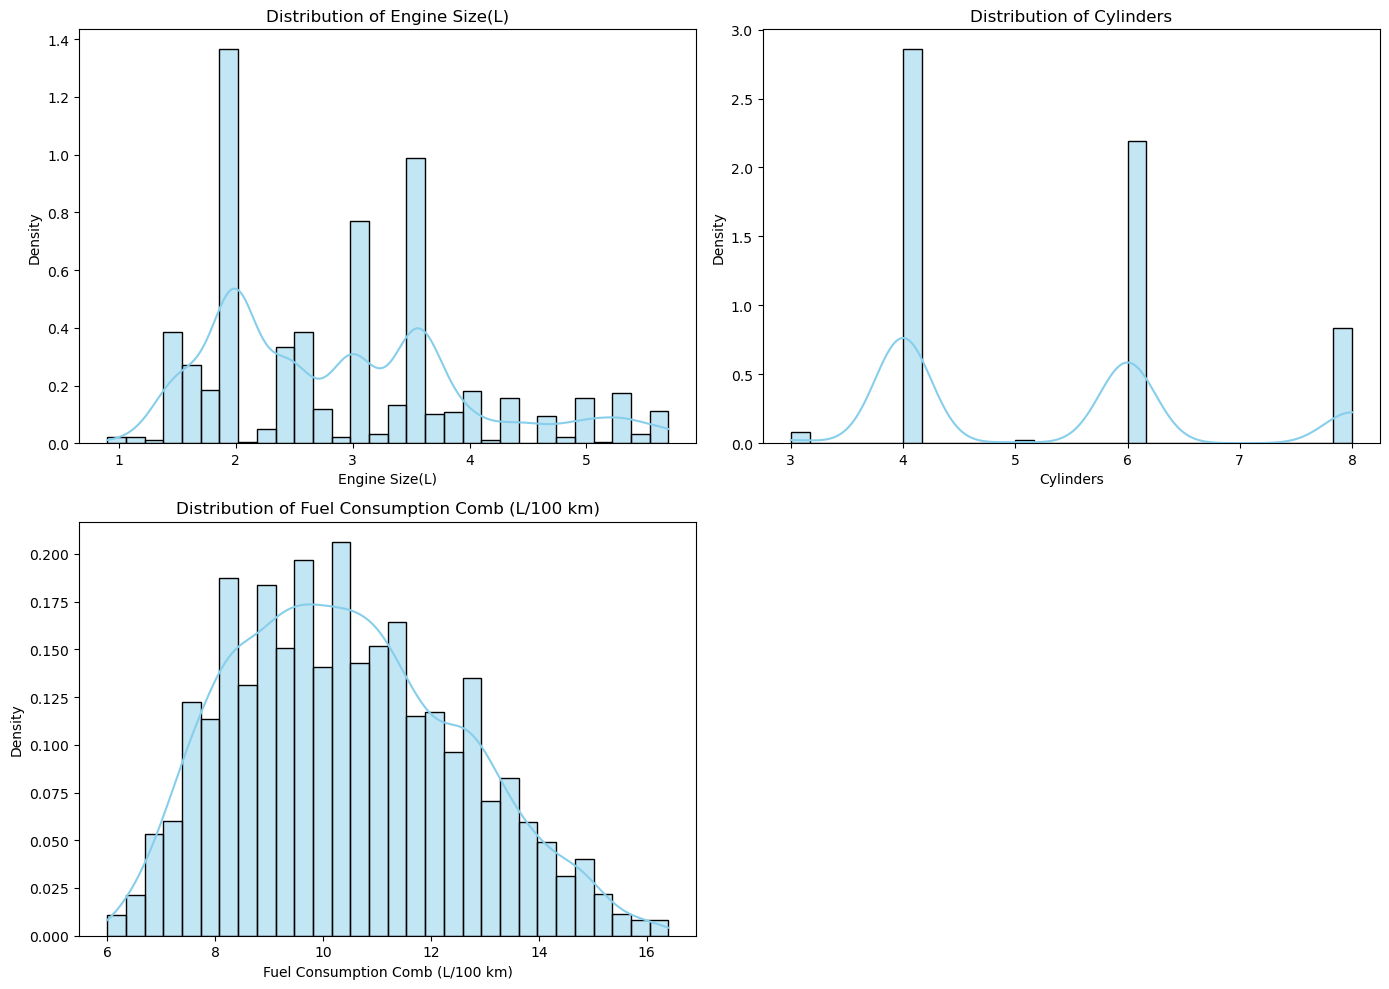

In [75]:
selected_features = df_new.columns[:-1]
plt.figure(figsize=(14, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_new[feature], kde=True, bins=30, color='skyblue', stat='density')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


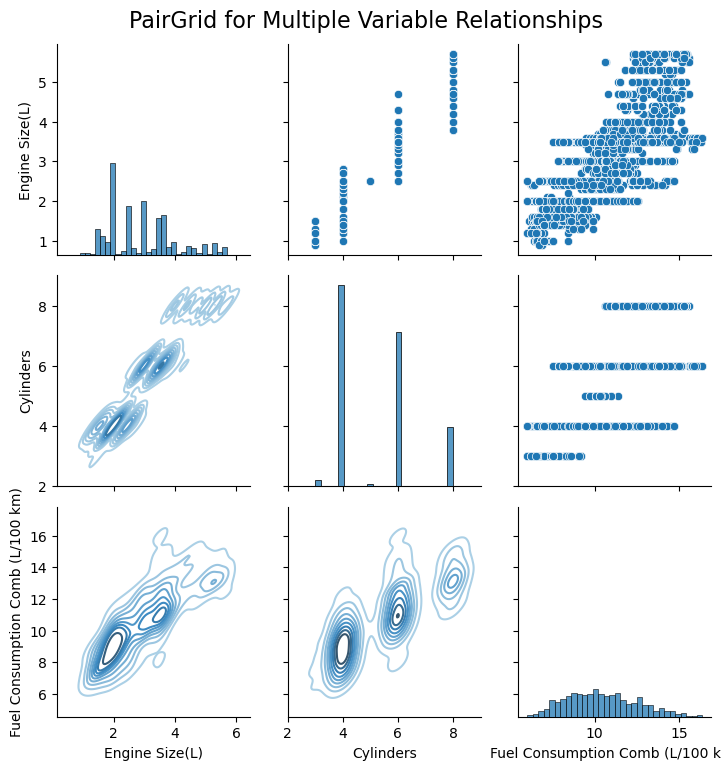

In [76]:
g = sns.PairGrid(df_new[df_new.columns[:-1]])
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})
g.map_lower(sns.kdeplot, cmap='Blues_d')
plt.suptitle('PairGrid for Multiple Variable Relationships', y=1.02, fontsize=16)
plt.show()

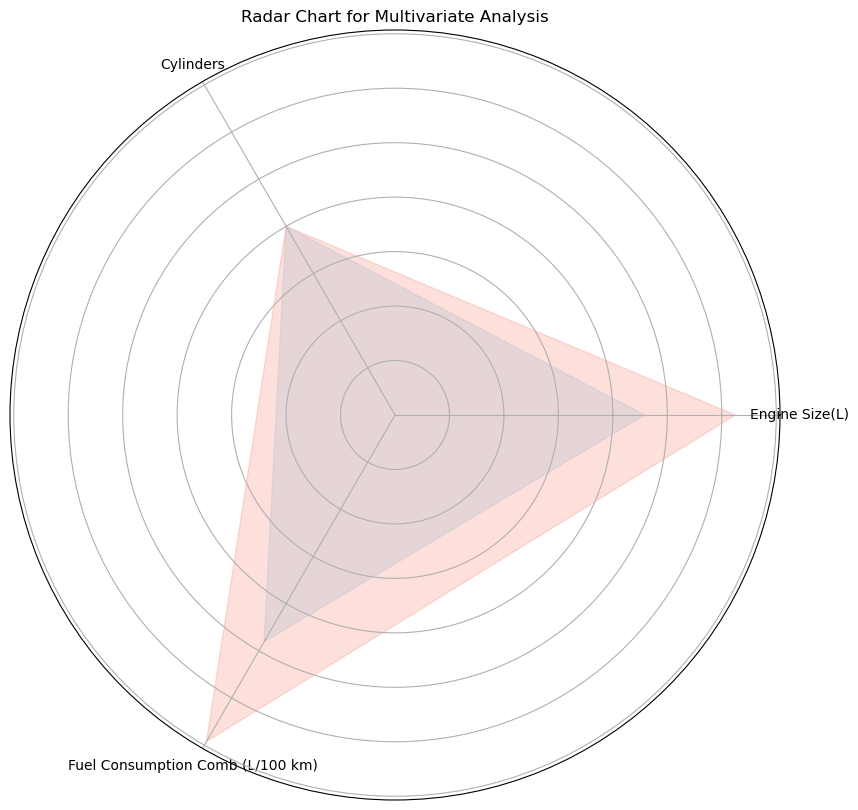

In [77]:
from math import pi
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_new[selected_features])
labels = selected_features
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.fill(angles, normalized_data[0], color='skyblue', alpha=0.25)
ax.fill(angles, normalized_data[1], color='salmon', alpha=0.25)
ax.set_yticklabels([])
ax.set_thetagrids(np.degrees(angles), labels)
plt.title('Radar Chart for Multivariate Analysis')
plt.show()


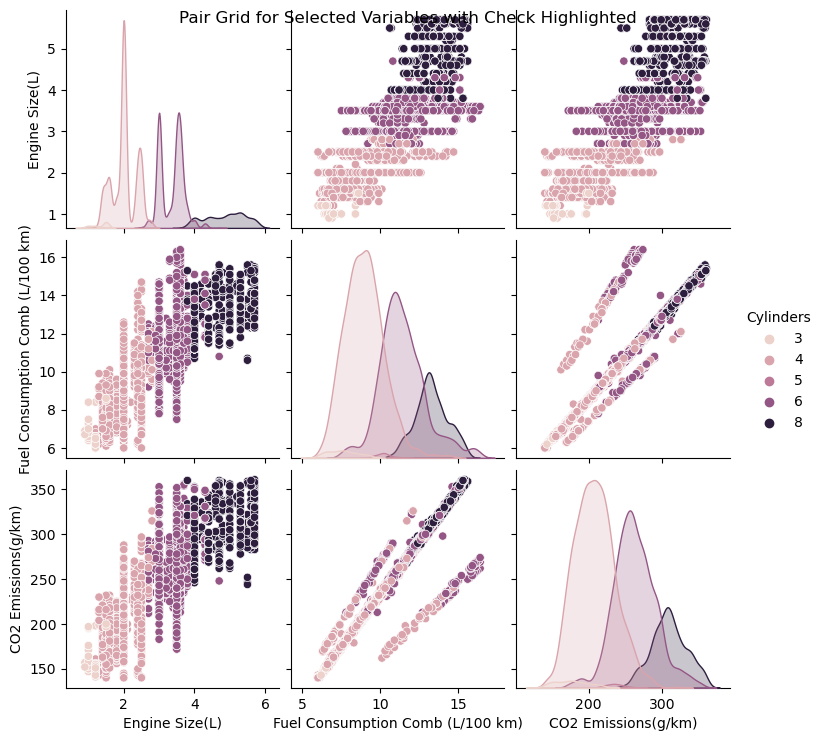

In [81]:
selected_vars = df_new.columns
sns.pairplot(df_new[selected_vars], hue='Cylinders')
plt.suptitle('Pair Grid for Selected Variables with Check Highlighted')
plt.show()


In [82]:
Data=df_new.copy()

In [83]:
def His_Box_plot(List):
    for i in range(len(List)):
        fig, axes = plt.subplots(nrows=2, ncols=1)
        sns.histplot(data=Data, x=List[i], kde=True, ax=axes[0])
        sns.boxplot(data=Data, x=List[i], ax=axes[1])
        axes[0].set_title(List[i], fontsize=18)
        axes[1].set_title(List[i], fontsize=18)
        axes[0].set_xlabel(None)
        axes[1].set_xlabel(None)
        plt.show()

In [84]:
Categorical = Data.select_dtypes(["object"])
Numerical = Data.select_dtypes(["float64","int64"])
Numerical=Numerical.columns
Categorical=Categorical.columns

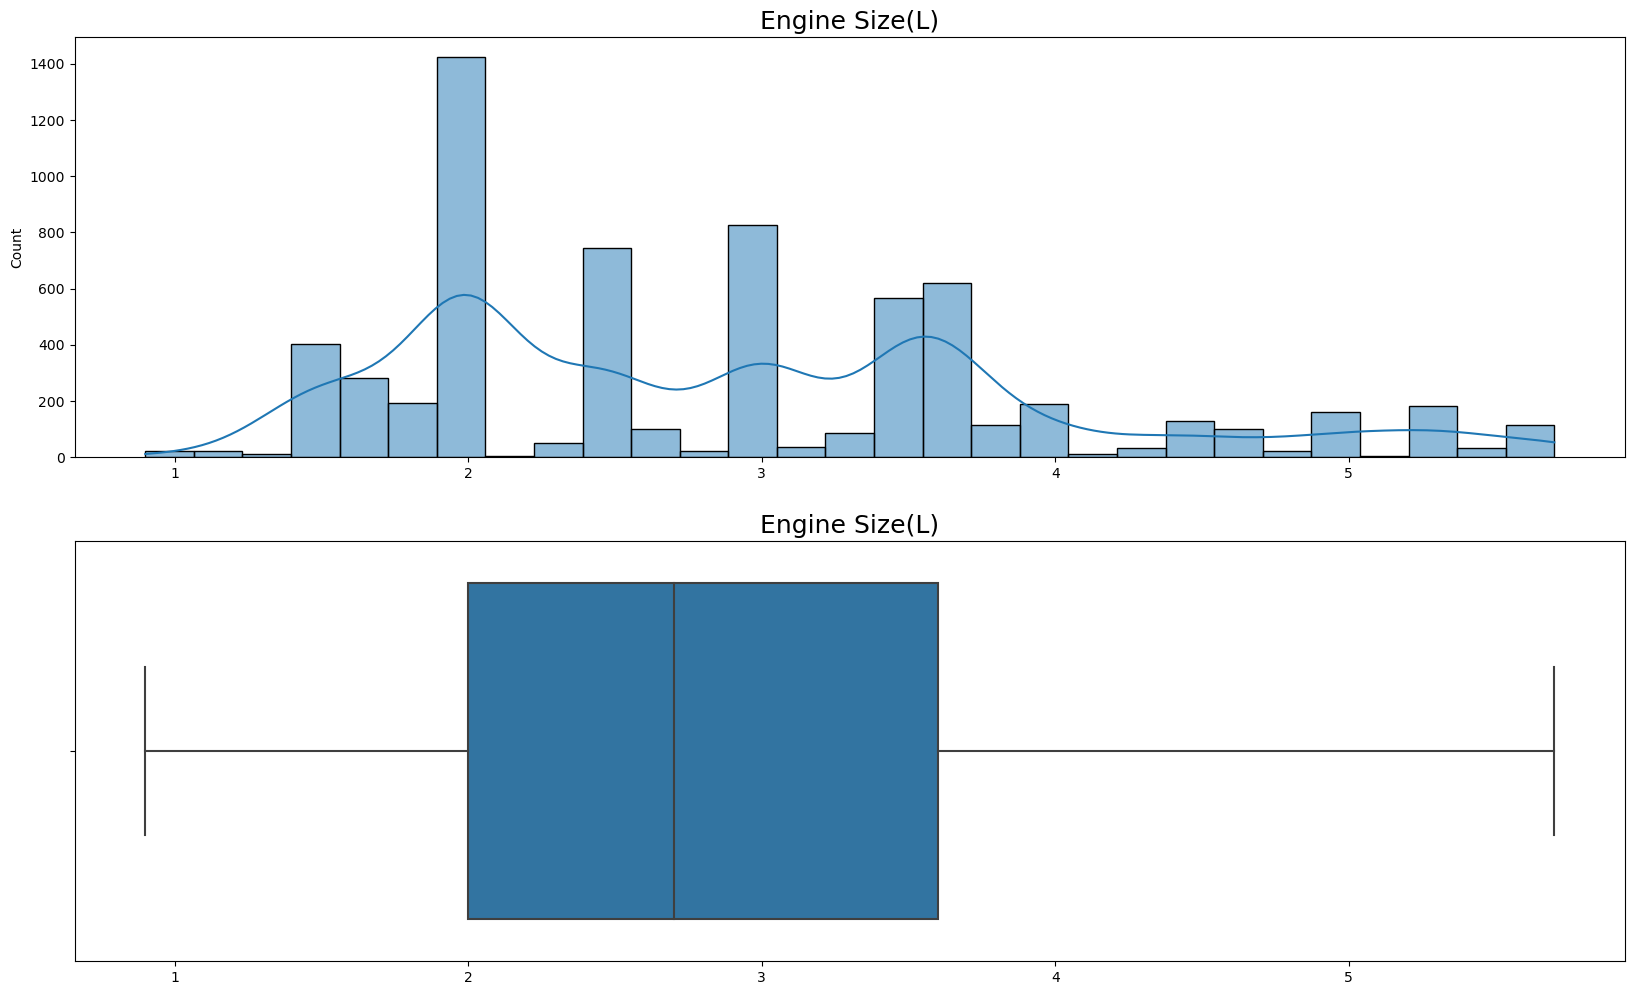

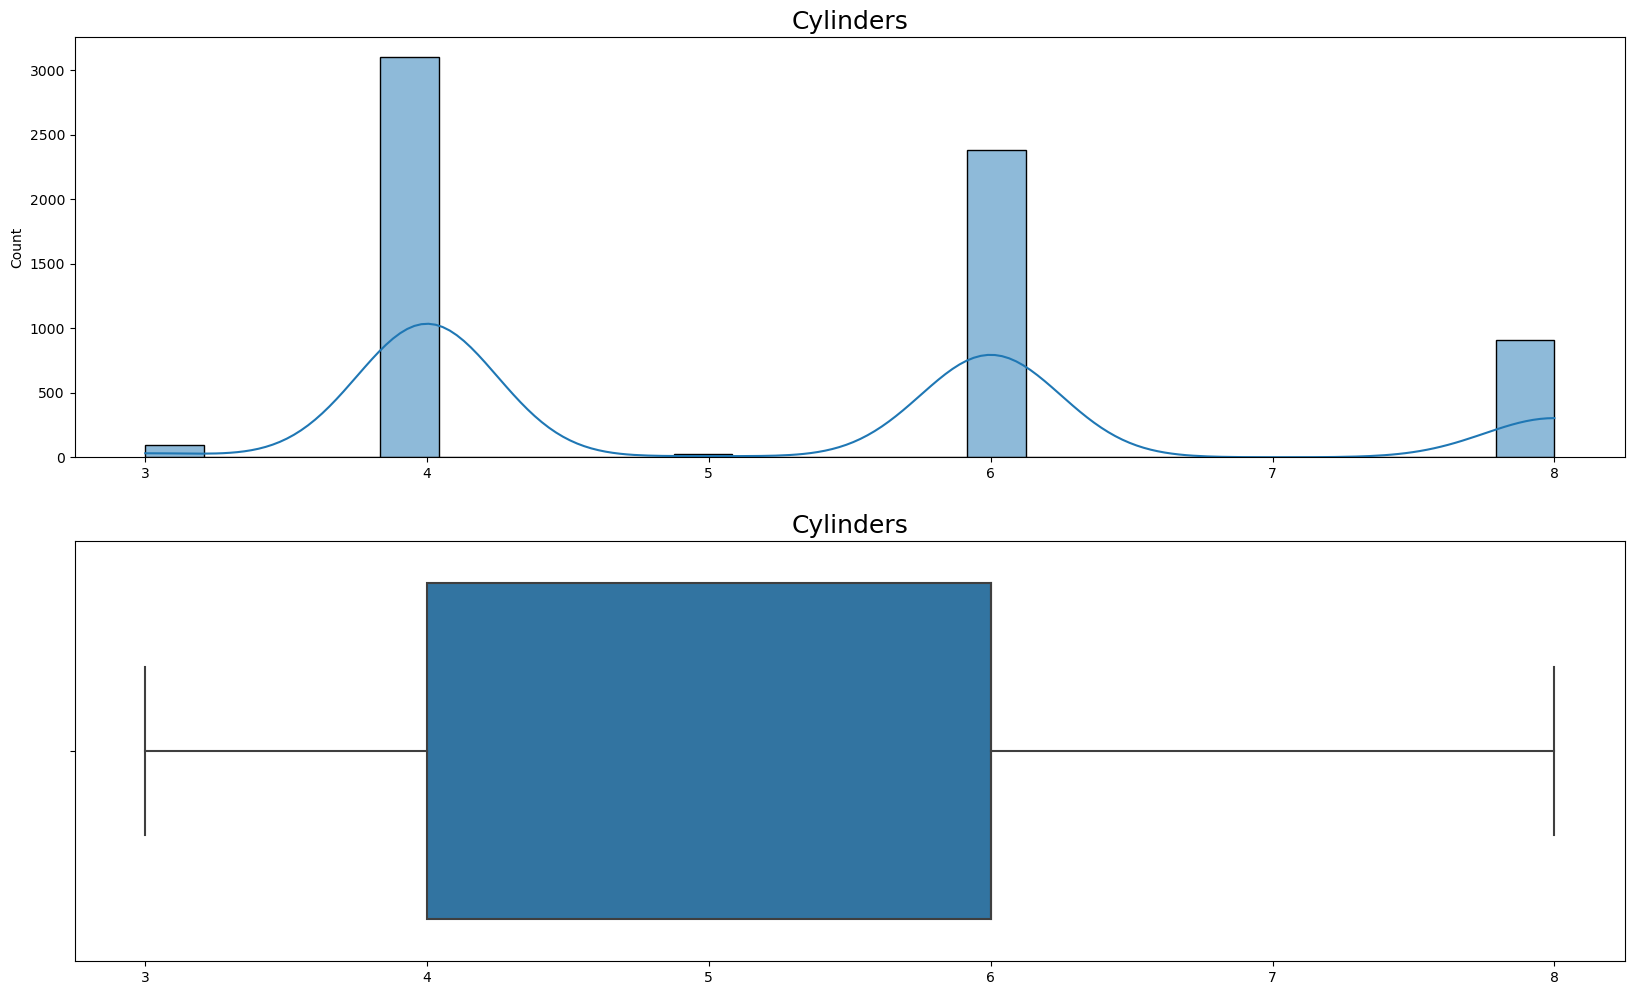

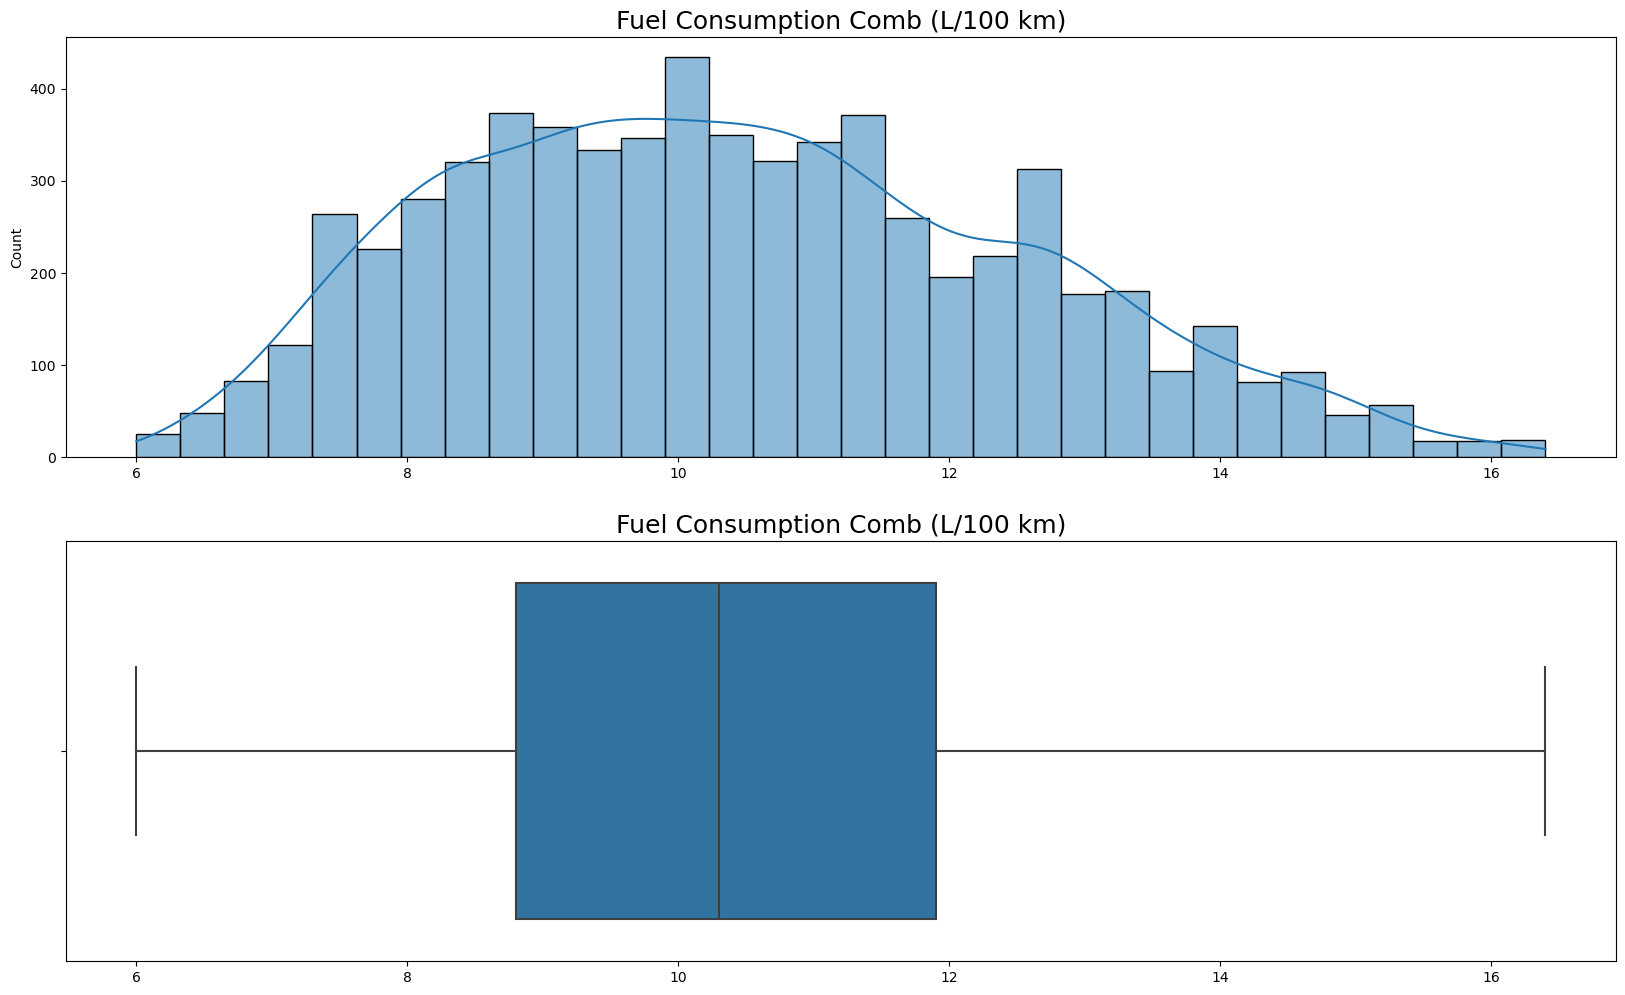

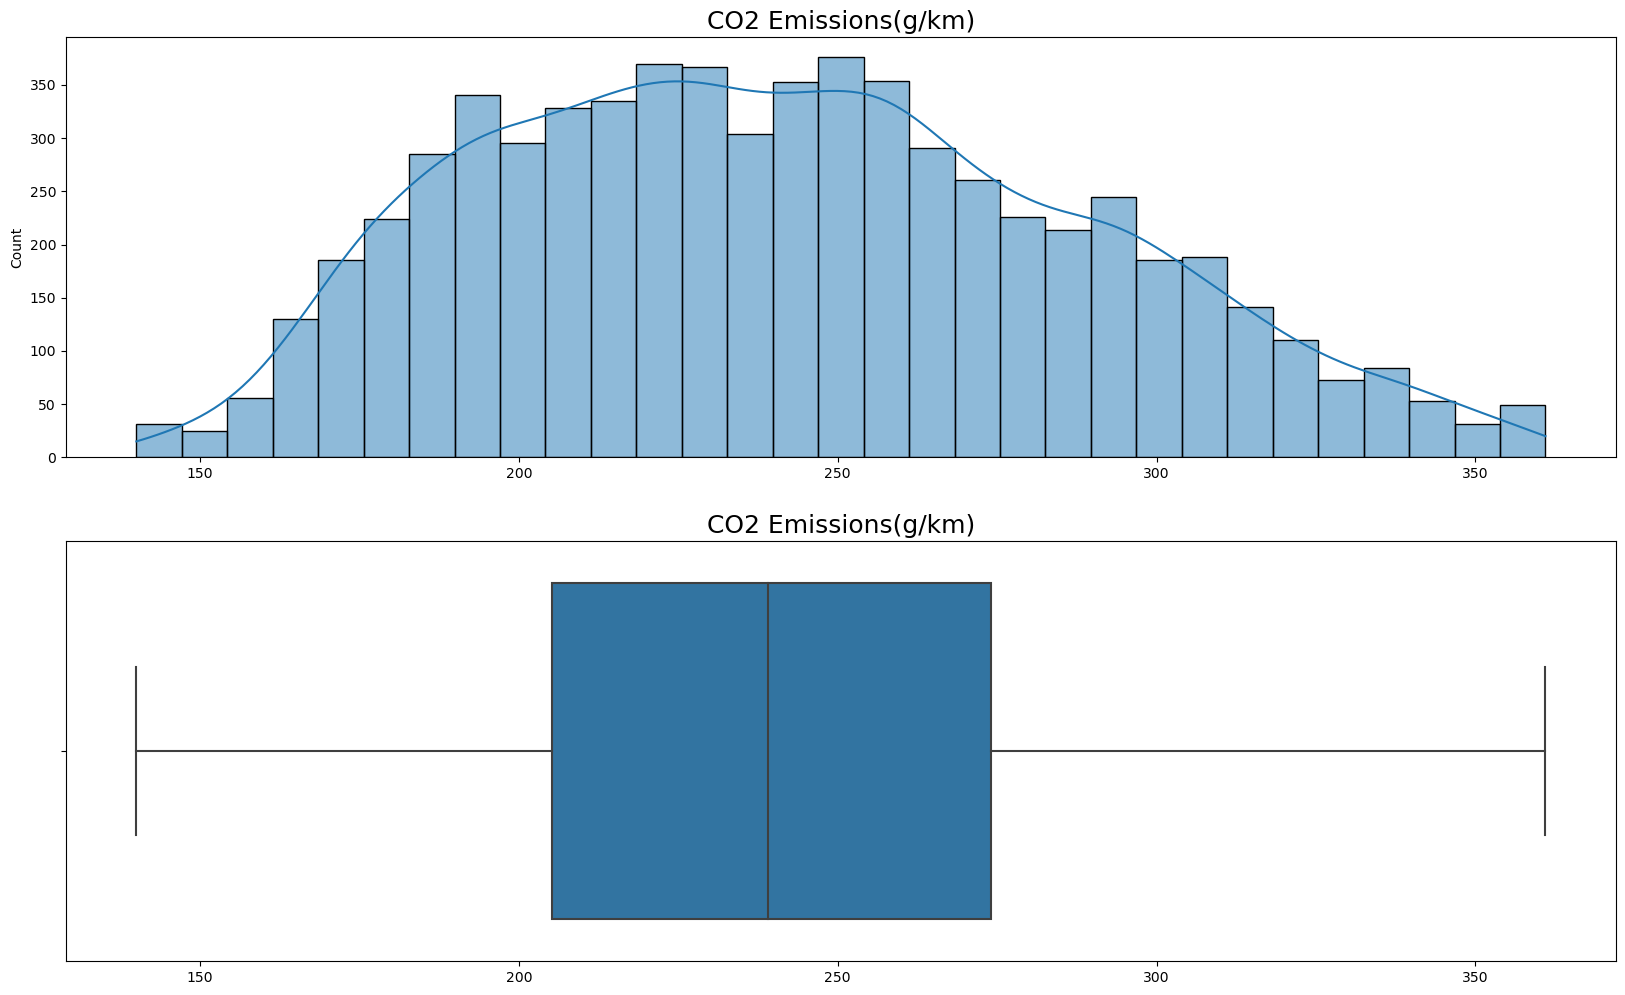

In [85]:
His_Box_plot(Numerical)

In [86]:
Data

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,3.5,6,11.1,255
3,3.5,6,10.6,244
4,3.5,6,10.0,230
...,...,...,...,...
6505,2.0,4,9.4,219
6506,2.0,4,9.9,232
6507,2.0,4,10.3,240
6508,2.0,4,9.9,232
